In [58]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

In [59]:
n_layer = 32

In [60]:
all_norms = torch.load(f'./ana_norm_{n_layer}.pt')

In [61]:
all_norms.keys()

dict_keys(['SMoE', 'RMoE', 'RMoE_np', 'RMoE_np_r05'])

In [62]:
all_norms['SMoE'].keys()

dict_keys(['module.key_pe', 'module.in_emb.weight', 'module.out_emb.weight', 'module.out_emb.bias', 'module.layers.0.attn.proj_query.weight', 'module.layers.0.attn.proj_out.weight', 'module.layers.0.attn.proj_val.weight', 'module.layers.0.attn.proj_key.weight', 'module.layers.0.smoe.gate.gate.weight', 'module.layers.0.smoe.gate.gate.bias', 'module.layers.0.smoe.experts.htoh4.weight', 'module.layers.0.smoe.experts.htoh4.bias', 'module.layers.0.smoe.experts.h4toh.weight', 'module.layers.0.smoe.experts.h4toh.bias', 'module.layers.0.smoe.layer_norm.weight', 'module.layers.0.smoe.layer_norm.bias', 'module.layers.0.norm1.weight', 'module.layers.0.norm1.bias', 'module.layers.0.norm2.weight', 'module.layers.0.norm2.bias', 'module.layers.0.norm3.weight', 'module.layers.0.norm3.bias', 'module.layers.1.attn.proj_query.weight', 'module.layers.1.attn.proj_out.weight', 'module.layers.1.attn.proj_val.weight', 'module.layers.1.attn.proj_key.weight', 'module.layers.1.smoe.gate.gate.weight', 'module.lay

In [2]:
def get_similarities(htoh4_0, htoh4_1, h4toh):
    avg_key_0 = htoh4_0.mean(dim=1) # (num_experts, 4h, h)
    avg_key_1 = htoh4_1.mean(dim=1) # (num_experts, h)
    avg_value = h4toh.mean(dim=2) # (num_experts, h)
    normed_key_0 = nn.functional.normalize(avg_key_0, p=2, dim=1)
    normed_key_1 = nn.functional.normalize(avg_key_1, p=2, dim=1)
    normed_value = nn.functional.normalize(avg_value, p=2, dim=1)
    normed_avg_expert = torch.cat([normed_key_0, normed_key_1, normed_value], dim=1)
    avg_expert = torch.cat([avg_key_0, avg_key_1, avg_value], dim=1)
    # 计算 experts 间的平均相似度
    similarity = torch.mm(avg_expert, avg_expert.t()) 
    avg_sim = similarity.mean().item()

    normed_similarity = torch.mm(normed_avg_expert, normed_avg_expert.t())
    normed_avg_sim = normed_similarity.mean().item()
    return avg_sim, normed_avg_sim

In [ ]:
# dict_keys(['model.embed_tokens.weight', 'model.layers.0.input_layernorm.weight', 'model.layers.0.self_attn.o_proj.weight', 'model.layers.0.self_attn.q_proj.weight', 'model.layers.0.self_attn.k_proj.weight', 'model.layers.0.self_attn.v_proj.weight', 'model.layers.0.post_attention_layernorm.weight', 'model.layers.0.block_sparse_moe.gate.weight', 'model.layers.0.block_sparse_moe.experts.0.w1.weight', 'model.layers.0.block_sparse_moe.experts.1.w1.weight', 'model.layers.0.block_sparse_moe.experts.2.w1.weight', 'model.layers.0.block_sparse_moe.experts.3.w1.weight', 'model.layers.0.block_sparse_moe.experts.4.w1.weight', 'model.layers.0.block_sparse_moe.experts.5.w1.weight', 'model.layers.0.block_sparse_moe.experts.6.w1.weight', 'model.layers.0.block_sparse_moe.experts.7.w1.weight', 'model.layers.0.block_sparse_moe.experts.8.w1.weight', 'model.layers.0.block_sparse_moe.experts.9.w1.weight', 'model.layers.0.block_sparse_moe.experts.10.w1.weight', 'model.layers.0.block_sparse_moe.experts.11.w1.weight', 'model.layers.0.block_sparse_moe.experts.12.w1.weight', 'model.layers.0.block_sparse_moe.experts.13.w1.weight', 'model.layers.0.block_sparse_moe.experts.14.w1.weight', 'model.layers.0.block_sparse_moe.experts.15.w1.weight', 'model.layers.0.block_sparse_moe.experts.0.w3.weight', 'model.layers.0.block_sparse_moe.experts.1.w3.weight', 'model.layers.0.block_sparse_moe.experts.2.w3.weight', 'model.layers.0.block_sparse_moe.experts.3.w3.weight', 'model.layers.0.block_sparse_moe.experts.4.w3.weight', 'model.layers.0.block_sparse_moe.experts.5.w3.weight', 'model.layers.0.block_sparse_moe.experts.6.w3.weight', 'model.layers.0.block_sparse_moe.experts.7.w3.weight', 'model.layers.0.block_sparse_moe.experts.8.w3.weight', 'model.layers.0.block_sparse_moe.experts.9.w3.weight', 'model.layers.0.block_sparse_moe.experts.10.w3.weight', 'model.layers.0.block_sparse_moe.experts.11.w3.weight', 'model.layers.0.block_sparse_moe.experts.12.w3.weight', 'model.layers.0.block_sparse_moe.experts.13.w3.weight', 'model.layers.0.block_sparse_moe.experts.14.w3.weight', 'model.layers.0.block_sparse_moe.experts.15.w3.weight', 'model.layers.0.block_sparse_moe.experts.0.w2.weight', 'model.layers.0.block_sparse_moe.experts.1.w2.weight', 'model.layers.0.block_sparse_moe.experts.2.w2.weight', 'model.layers.0.block_sparse_moe.experts.3.w2.weight', 'model.layers.0.block_sparse_moe.experts.4.w2.weight', 'model.layers.0.block_sparse_moe.experts.5.w2.weight', 'model.layers.0.block_sparse_moe.experts.6.w2.weight', 'model.layers.0.block_sparse_moe.experts.7.w2.weight', 'model.layers.0.block_sparse_moe.experts.8.w2.weight', 'model.layers.0.block_sparse_moe.experts.9.w2.weight', 'model.layers.0.block_sparse_moe.experts.10.w2.weight', 'model.layers.0.block_sparse_moe.experts.11.w2.weight', 'model.layers.0.block_sparse_moe.experts.12.w2.weight', 'model.layers.0.block_sparse_moe.experts.13.w2.weight', 'model.layers.0.block_sparse_moe.experts.14.w2.weight', 'model.layers.0.block_sparse_moe.experts.15.w2.weight', 'model.layers.1.input_layernorm.weight', 'model.layers.1.self_attn.o_proj.weight', 'model.layers.1.self_attn.q_proj.weight', 'model.layers.1.self_attn.k_proj.weight', 'model.layers.1.self_attn.v_proj.weight', 'model.layers.1.post_attention_layernorm.weight', 'model.layers.1.block_sparse_moe.gate.weight', 'model.layers.1.block_sparse_moe.experts.0.w1.weight', 'model.layers.1.block_sparse_moe.experts.1.w1.weight', 'model.layers.1.block_sparse_moe.experts.2.w1.weight', 'model.layers.1.block_sparse_moe.experts.3.w1.weight', 'model.layers.1.block_sparse_moe.experts.4.w1.weight', 'model.layers.1.block_sparse_moe.experts.5.w1.weight', 'model.layers.1.block_sparse_moe.experts.6.w1.weight', 'model.layers.1.block_sparse_moe.experts.7.w1.weight', 'model.layers.1.block_sparse_moe.experts.8.w1.weight', 'model.layers.1.block_sparse_moe.experts.9.w1.weight', 'model.layers.1.block_sparse_moe.experts.10.w1.weight', 'model.layers.1.block_sparse_moe.experts.11.w1.weight', 'model.layers.1.block_sparse_moe.experts.12.w1.weight', 'model.layers.1.block_sparse_moe.experts.13.w1.weight', 'model.layers.1.block_sparse_moe.experts.14.w1.weight', 'model.layers.1.block_sparse_moe.experts.15.w1.weight', 'model.layers.1.block_sparse_moe.experts.0.w3.weight', 'model.layers.1.block_sparse_moe.experts.1.w3.weight', 'model.layers.1.block_sparse_moe.experts.2.w3.weight', 'model.layers.1.block_sparse_moe.experts.3.w3.weight', 'model.layers.1.block_sparse_moe.experts.4.w3.weight', 'model.layers.1.block_sparse_moe.experts.5.w3.weight', 'model.layers.1.block_sparse_moe.experts.6.w3.weight', 'model.layers.1.block_sparse_moe.experts.7.w3.weight', 'model.layers.1.block_sparse_moe.experts.8.w3.weight', 'model.layers.1.block_sparse_moe.experts.9.w3.weight', 'model.layers.1.block_sparse_moe.experts.10.w3.weight', 'model.layers.1.block_sparse_moe.experts.11.w3.weight', 'model.layers.1.block_sparse_moe.experts.12.w3.weight', 'model.layers.1.block_sparse_moe.experts.13.w3.weight', 'model.layers.1.block_sparse_moe.experts.14.w3.weight', 'model.layers.1.block_sparse_moe.experts.15.w3.weight', 'model.layers.1.block_sparse_moe.experts.0.w2.weight', 'model.layers.1.block_sparse_moe.experts.1.w2.weight', 'model.layers.1.block_sparse_moe.experts.2.w2.weight', 'model.layers.1.block_sparse_moe.experts.3.w2.weight', 'model.layers.1.block_sparse_moe.experts.4.w2.weight', 'model.layers.1.block_sparse_moe.experts.5.w2.weight', 'model.layers.1.block_sparse_moe.experts.6.w2.weight', 'model.layers.1.block_sparse_moe.experts.7.w2.weight', 'model.layers.1.block_sparse_moe.experts.8.w2.weight', 'model.layers.1.block_sparse_moe.experts.9.w2.weight', 'model.layers.1.block_sparse_moe.experts.10.w2.weight', 'model.layers.1.block_sparse_moe.experts.11.w2.weight', 'model.layers.1.block_sparse_moe.experts.12.w2.weight', 'model.layers.1.block_sparse_moe.experts.13.w2.weight', 'model.layers.1.block_sparse_moe.experts.14.w2.weight', 'model.layers.1.block_sparse_moe.experts.15.w2.weight', 'model.layers.2.input_layernorm.weight', 'model.layers.2.self_attn.o_proj.weight', 'model.layers.2.self_attn.q_proj.weight', 'model.layers.2.self_attn.k_proj.weight', 'model.layers.2.self_attn.v_proj.weight', 'model.layers.2.post_attention_layernorm.weight', 'model.layers.2.block_sparse_moe.gate.weight', 'model.layers.2.block_sparse_moe.experts.0.w1.weight', 'model.layers.2.block_sparse_moe.experts.1.w1.weight', 'model.layers.2.block_sparse_moe.experts.2.w1.weight', 'model.layers.2.block_sparse_moe.experts.3.w1.weight', 'model.layers.2.block_sparse_moe.experts.4.w1.weight', 'model.layers.2.block_sparse_moe.experts.5.w1.weight', 'model.layers.2.block_sparse_moe.experts.6.w1.weight', 'model.layers.2.block_sparse_moe.experts.7.w1.weight', 'model.layers.2.block_sparse_moe.experts.8.w1.weight', 'model.layers.2.block_sparse_moe.experts.9.w1.weight', 'model.layers.2.block_sparse_moe.experts.10.w1.weight', 'model.layers.2.block_sparse_moe.experts.11.w1.weight', 'model.layers.2.block_sparse_moe.experts.12.w1.weight', 'model.layers.2.block_sparse_moe.experts.13.w1.weight', 'model.layers.2.block_sparse_moe.experts.14.w1.weight', 'model.layers.2.block_sparse_moe.experts.15.w1.weight', 'model.layers.2.block_sparse_moe.experts.0.w3.weight', 'model.layers.2.block_sparse_moe.experts.1.w3.weight', 'model.layers.2.block_sparse_moe.experts.2.w3.weight', 'model.layers.2.block_sparse_moe.experts.3.w3.weight', 'model.layers.2.block_sparse_moe.experts.4.w3.weight', 'model.layers.2.block_sparse_moe.experts.5.w3.weight', 'model.layers.2.block_sparse_moe.experts.6.w3.weight', 'model.layers.2.block_sparse_moe.experts.7.w3.weight', 'model.layers.2.block_sparse_moe.experts.8.w3.weight', 'model.layers.2.block_sparse_moe.experts.9.w3.weight', 'model.layers.2.block_sparse_moe.experts.10.w3.weight', 'model.layers.2.block_sparse_moe.experts.11.w3.weight', 'model.layers.2.block_sparse_moe.experts.12.w3.weight', 'model.layers.2.block_sparse_moe.experts.13.w3.weight', 'model.layers.2.block_sparse_moe.experts.14.w3.weight', 'model.layers.2.block_sparse_moe.experts.15.w3.weight', 'model.layers.2.block_sparse_moe.experts.0.w2.weight', 'model.layers.2.block_sparse_moe.experts.1.w2.weight', 'model.layers.2.block_sparse_moe.experts.2.w2.weight', 'model.layers.2.block_sparse_moe.experts.3.w2.weight', 'model.layers.2.block_sparse_moe.experts.4.w2.weight', 'model.layers.2.block_sparse_moe.experts.5.w2.weight', 'model.layers.2.block_sparse_moe.experts.6.w2.weight', 'model.layers.2.block_sparse_moe.experts.7.w2.weight', 'model.layers.2.block_sparse_moe.experts.8.w2.weight', 'model.layers.2.block_sparse_moe.experts.9.w2.weight', 'model.layers.2.block_sparse_moe.experts.10.w2.weight', 'model.layers.2.block_sparse_moe.experts.11.w2.weight', 'model.layers.2.block_sparse_moe.experts.12.w2.weight', 'model.layers.2.block_sparse_moe.experts.13.w2.weight', 'model.layers.2.block_sparse_moe.experts.14.w2.weight', 'model.layers.2.block_sparse_moe.experts.15.w2.weight', 'model.layers.3.input_layernorm.weight', 'model.layers.3.self_attn.o_proj.weight', 'model.layers.3.self_attn.q_proj.weight', 'model.layers.3.self_attn.k_proj.weight', 'model.layers.3.self_attn.v_proj.weight', 'model.layers.3.post_attention_layernorm.weight', 'model.layers.3.block_sparse_moe.gate.weight', 'model.layers.3.block_sparse_moe.experts.0.w1.weight', 'model.layers.3.block_sparse_moe.experts.1.w1.weight', 'model.layers.3.block_sparse_moe.experts.2.w1.weight', 'model.layers.3.block_sparse_moe.experts.3.w1.weight', 'model.layers.3.block_sparse_moe.experts.4.w1.weight', 'model.layers.3.block_sparse_moe.experts.5.w1.weight', 'model.layers.3.block_sparse_moe.experts.6.w1.weight', 'model.layers.3.block_sparse_moe.experts.7.w1.weight', 'model.layers.3.block_sparse_moe.experts.8.w1.weight', 'model.layers.3.block_sparse_moe.experts.9.w1.weight', 'model.layers.3.block_sparse_moe.experts.10.w1.weight', 'model.layers.3.block_sparse_moe.experts.11.w1.weight', 'model.layers.3.block_sparse_moe.experts.12.w1.weight', 'model.layers.3.block_sparse_moe.experts.13.w1.weight', 'model.layers.3.block_sparse_moe.experts.14.w1.weight', 'model.layers.3.block_sparse_moe.experts.15.w1.weight', 'model.layers.3.block_sparse_moe.experts.0.w3.weight', 'model.layers.3.block_sparse_moe.experts.1.w3.weight', 'model.layers.3.block_sparse_moe.experts.2.w3.weight', 'model.layers.3.block_sparse_moe.experts.3.w3.weight', 'model.layers.3.block_sparse_moe.experts.4.w3.weight', 'model.layers.3.block_sparse_moe.experts.5.w3.weight', 'model.layers.3.block_sparse_moe.experts.6.w3.weight', 'model.layers.3.block_sparse_moe.experts.7.w3.weight', 'model.layers.3.block_sparse_moe.experts.8.w3.weight', 'model.layers.3.block_sparse_moe.experts.9.w3.weight', 'model.layers.3.block_sparse_moe.experts.10.w3.weight', 'model.layers.3.block_sparse_moe.experts.11.w3.weight', 'model.layers.3.block_sparse_moe.experts.12.w3.weight', 'model.layers.3.block_sparse_moe.experts.13.w3.weight', 'model.layers.3.block_sparse_moe.experts.14.w3.weight', 'model.layers.3.block_sparse_moe.experts.15.w3.weight', 'model.layers.3.block_sparse_moe.experts.0.w2.weight', 'model.layers.3.block_sparse_moe.experts.1.w2.weight', 'model.layers.3.block_sparse_moe.experts.2.w2.weight', 'model.layers.3.block_sparse_moe.experts.3.w2.weight', 'model.layers.3.block_sparse_moe.experts.4.w2.weight', 'model.layers.3.block_sparse_moe.experts.5.w2.weight', 'model.layers.3.block_sparse_moe.experts.6.w2.weight', 'model.layers.3.block_sparse_moe.experts.7.w2.weight', 'model.layers.3.block_sparse_moe.experts.8.w2.weight', 'model.layers.3.block_sparse_moe.experts.9.w2.weight', 'model.layers.3.block_sparse_moe.experts.10.w2.weight', 'model.layers.3.block_sparse_moe.experts.11.w2.weight', 'model.layers.3.block_sparse_moe.experts.12.w2.weight', 'model.layers.3.block_sparse_moe.experts.13.w2.weight', 'model.layers.3.block_sparse_moe.experts.14.w2.weight', 'model.layers.3.block_sparse_moe.experts.15.w2.weight', 'model.layers.4.input_layernorm.weight', 'model.layers.4.self_attn.o_proj.weight', 'model.layers.4.self_attn.q_proj.weight', 'model.layers.4.self_attn.k_proj.weight', 'model.layers.4.self_attn.v_proj.weight', 'model.layers.4.post_attention_layernorm.weight', 'model.layers.4.block_sparse_moe.gate.weight', 'model.layers.4.block_sparse_moe.experts.0.w1.weight', 'model.layers.4.block_sparse_moe.experts.1.w1.weight', 'model.layers.4.block_sparse_moe.experts.2.w1.weight', 'model.layers.4.block_sparse_moe.experts.3.w1.weight', 'model.layers.4.block_sparse_moe.experts.4.w1.weight', 'model.layers.4.block_sparse_moe.experts.5.w1.weight', 'model.layers.4.block_sparse_moe.experts.6.w1.weight', 'model.layers.4.block_sparse_moe.experts.7.w1.weight', 'model.layers.4.block_sparse_moe.experts.8.w1.weight', 'model.layers.4.block_sparse_moe.experts.9.w1.weight', 'model.layers.4.block_sparse_moe.experts.10.w1.weight', 'model.layers.4.block_sparse_moe.experts.11.w1.weight', 'model.layers.4.block_sparse_moe.experts.12.w1.weight', 'model.layers.4.block_sparse_moe.experts.13.w1.weight', 'model.layers.4.block_sparse_moe.experts.14.w1.weight', 'model.layers.4.block_sparse_moe.experts.15.w1.weight', 'model.layers.4.block_sparse_moe.experts.0.w3.weight', 'model.layers.4.block_sparse_moe.experts.1.w3.weight', 'model.layers.4.block_sparse_moe.experts.2.w3.weight', 'model.layers.4.block_sparse_moe.experts.3.w3.weight', 'model.layers.4.block_sparse_moe.experts.4.w3.weight', 'model.layers.4.block_sparse_moe.experts.5.w3.weight', 'model.layers.4.block_sparse_moe.experts.6.w3.weight', 'model.layers.4.block_sparse_moe.experts.7.w3.weight', 'model.layers.4.block_sparse_moe.experts.8.w3.weight', 'model.layers.4.block_sparse_moe.experts.9.w3.weight', 'model.layers.4.block_sparse_moe.experts.10.w3.weight', 'model.layers.4.block_sparse_moe.experts.11.w3.weight', 'model.layers.4.block_sparse_moe.experts.12.w3.weight', 'model.layers.4.block_sparse_moe.experts.13.w3.weight', 'model.layers.4.block_sparse_moe.experts.14.w3.weight', 'model.layers.4.block_sparse_moe.experts.15.w3.weight', 'model.layers.4.block_sparse_moe.experts.0.w2.weight', 'model.layers.4.block_sparse_moe.experts.1.w2.weight', 'model.layers.4.block_sparse_moe.experts.2.w2.weight', 'model.layers.4.block_sparse_moe.experts.3.w2.weight', 'model.layers.4.block_sparse_moe.experts.4.w2.weight', 'model.layers.4.block_sparse_moe.experts.5.w2.weight', 'model.layers.4.block_sparse_moe.experts.6.w2.weight', 'model.layers.4.block_sparse_moe.experts.7.w2.weight', 'model.layers.4.block_sparse_moe.experts.8.w2.weight', 'model.layers.4.block_sparse_moe.experts.9.w2.weight', 'model.layers.4.block_sparse_moe.experts.10.w2.weight', 'model.layers.4.block_sparse_moe.experts.11.w2.weight', 'model.layers.4.block_sparse_moe.experts.12.w2.weight', 'model.layers.4.block_sparse_moe.experts.13.w2.weight', 'model.layers.4.block_sparse_moe.experts.14.w2.weight', 'model.layers.4.block_sparse_moe.experts.15.w2.weight', 'model.layers.5.input_layernorm.weight', 'model.layers.5.self_attn.o_proj.weight', 'model.layers.5.self_attn.q_proj.weight', 'model.layers.5.self_attn.k_proj.weight', 'model.layers.5.self_attn.v_proj.weight', 'model.layers.5.post_attention_layernorm.weight', 'model.layers.5.block_sparse_moe.gate.weight', 'model.layers.5.block_sparse_moe.experts.0.w1.weight', 'model.layers.5.block_sparse_moe.experts.1.w1.weight', 'model.layers.5.block_sparse_moe.experts.2.w1.weight', 'model.layers.5.block_sparse_moe.experts.3.w1.weight', 'model.layers.5.block_sparse_moe.experts.4.w1.weight', 'model.layers.5.block_sparse_moe.experts.5.w1.weight', 'model.layers.5.block_sparse_moe.experts.6.w1.weight', 'model.layers.5.block_sparse_moe.experts.7.w1.weight', 'model.layers.5.block_sparse_moe.experts.8.w1.weight', 'model.layers.5.block_sparse_moe.experts.9.w1.weight', 'model.layers.5.block_sparse_moe.experts.10.w1.weight', 'model.layers.5.block_sparse_moe.experts.11.w1.weight', 'model.layers.5.block_sparse_moe.experts.12.w1.weight', 'model.layers.5.block_sparse_moe.experts.13.w1.weight', 'model.layers.5.block_sparse_moe.experts.14.w1.weight', 'model.layers.5.block_sparse_moe.experts.15.w1.weight', 'model.layers.5.block_sparse_moe.experts.0.w3.weight', 'model.layers.5.block_sparse_moe.experts.1.w3.weight', 'model.layers.5.block_sparse_moe.experts.2.w3.weight', 'model.layers.5.block_sparse_moe.experts.3.w3.weight', 'model.layers.5.block_sparse_moe.experts.4.w3.weight', 'model.layers.5.block_sparse_moe.experts.5.w3.weight', 'model.layers.5.block_sparse_moe.experts.6.w3.weight', 'model.layers.5.block_sparse_moe.experts.7.w3.weight', 'model.layers.5.block_sparse_moe.experts.8.w3.weight', 'model.layers.5.block_sparse_moe.experts.9.w3.weight', 'model.layers.5.block_sparse_moe.experts.10.w3.weight', 'model.layers.5.block_sparse_moe.experts.11.w3.weight', 'model.layers.5.block_sparse_moe.experts.12.w3.weight', 'model.layers.5.block_sparse_moe.experts.13.w3.weight', 'model.layers.5.block_sparse_moe.experts.14.w3.weight', 'model.layers.5.block_sparse_moe.experts.15.w3.weight', 'model.layers.5.block_sparse_moe.experts.0.w2.weight', 'model.layers.5.block_sparse_moe.experts.1.w2.weight', 'model.layers.5.block_sparse_moe.experts.2.w2.weight', 'model.layers.5.block_sparse_moe.experts.3.w2.weight', 'model.layers.5.block_sparse_moe.experts.4.w2.weight', 'model.layers.5.block_sparse_moe.experts.5.w2.weight', 'model.layers.5.block_sparse_moe.experts.6.w2.weight', 'model.layers.5.block_sparse_moe.experts.7.w2.weight', 'model.layers.5.block_sparse_moe.experts.8.w2.weight', 'model.layers.5.block_sparse_moe.experts.9.w2.weight', 'model.layers.5.block_sparse_moe.experts.10.w2.weight', 'model.layers.5.block_sparse_moe.experts.11.w2.weight', 'model.layers.5.block_sparse_moe.experts.12.w2.weight', 'model.layers.5.block_sparse_moe.experts.13.w2.weight', 'model.layers.5.block_sparse_moe.experts.14.w2.weight', 'model.layers.5.block_sparse_moe.experts.15.w2.weight', 'model.layers.6.input_layernorm.weight', 'model.layers.6.self_attn.o_proj.weight', 'model.layers.6.self_attn.q_proj.weight', 'model.layers.6.self_attn.k_proj.weight', 'model.layers.6.self_attn.v_proj.weight', 'model.layers.6.post_attention_layernorm.weight', 'model.layers.6.block_sparse_moe.gate.weight', 'model.layers.6.block_sparse_moe.experts.0.w1.weight', 'model.layers.6.block_sparse_moe.experts.1.w1.weight', 'model.layers.6.block_sparse_moe.experts.2.w1.weight', 'model.layers.6.block_sparse_moe.experts.3.w1.weight', 'model.layers.6.block_sparse_moe.experts.4.w1.weight', 'model.layers.6.block_sparse_moe.experts.5.w1.weight', 'model.layers.6.block_sparse_moe.experts.6.w1.weight', 'model.layers.6.block_sparse_moe.experts.7.w1.weight', 'model.layers.6.block_sparse_moe.experts.8.w1.weight', 'model.layers.6.block_sparse_moe.experts.9.w1.weight', 'model.layers.6.block_sparse_moe.experts.10.w1.weight', 'model.layers.6.block_sparse_moe.experts.11.w1.weight', 'model.layers.6.block_sparse_moe.experts.12.w1.weight', 'model.layers.6.block_sparse_moe.experts.13.w1.weight', 'model.layers.6.block_sparse_moe.experts.14.w1.weight', 'model.layers.6.block_sparse_moe.experts.15.w1.weight', 'model.layers.6.block_sparse_moe.experts.0.w3.weight', 'model.layers.6.block_sparse_moe.experts.1.w3.weight', 'model.layers.6.block_sparse_moe.experts.2.w3.weight', 'model.layers.6.block_sparse_moe.experts.3.w3.weight', 'model.layers.6.block_sparse_moe.experts.4.w3.weight', 'model.layers.6.block_sparse_moe.experts.5.w3.weight', 'model.layers.6.block_sparse_moe.experts.6.w3.weight', 'model.layers.6.block_sparse_moe.experts.7.w3.weight', 'model.layers.6.block_sparse_moe.experts.8.w3.weight', 'model.layers.6.block_sparse_moe.experts.9.w3.weight', 'model.layers.6.block_sparse_moe.experts.10.w3.weight', 'model.layers.6.block_sparse_moe.experts.11.w3.weight', 'model.layers.6.block_sparse_moe.experts.12.w3.weight', 'model.layers.6.block_sparse_moe.experts.13.w3.weight', 'model.layers.6.block_sparse_moe.experts.14.w3.weight', 'model.layers.6.block_sparse_moe.experts.15.w3.weight', 'model.layers.6.block_sparse_moe.experts.0.w2.weight', 'model.layers.6.block_sparse_moe.experts.1.w2.weight', 'model.layers.6.block_sparse_moe.experts.2.w2.weight', 'model.layers.6.block_sparse_moe.experts.3.w2.weight', 'model.layers.6.block_sparse_moe.experts.4.w2.weight', 'model.layers.6.block_sparse_moe.experts.5.w2.weight', 'model.layers.6.block_sparse_moe.experts.6.w2.weight', 'model.layers.6.block_sparse_moe.experts.7.w2.weight', 'model.layers.6.block_sparse_moe.experts.8.w2.weight', 'model.layers.6.block_sparse_moe.experts.9.w2.weight', 'model.layers.6.block_sparse_moe.experts.10.w2.weight', 'model.layers.6.block_sparse_moe.experts.11.w2.weight', 'model.layers.6.block_sparse_moe.experts.12.w2.weight', 'model.layers.6.block_sparse_moe.experts.13.w2.weight', 'model.layers.6.block_sparse_moe.experts.14.w2.weight', 'model.layers.6.block_sparse_moe.experts.15.w2.weight', 'model.layers.7.input_layernorm.weight', 'model.layers.7.self_attn.o_proj.weight', 'model.layers.7.self_attn.q_proj.weight', 'model.layers.7.self_attn.k_proj.weight', 'model.layers.7.self_attn.v_proj.weight', 'model.layers.7.post_attention_layernorm.weight', 'model.layers.7.block_sparse_moe.gate.weight', 'model.layers.7.block_sparse_moe.experts.0.w1.weight', 'model.layers.7.block_sparse_moe.experts.1.w1.weight', 'model.layers.7.block_sparse_moe.experts.2.w1.weight', 'model.layers.7.block_sparse_moe.experts.3.w1.weight', 'model.layers.7.block_sparse_moe.experts.4.w1.weight', 'model.layers.7.block_sparse_moe.experts.5.w1.weight', 'model.layers.7.block_sparse_moe.experts.6.w1.weight', 'model.layers.7.block_sparse_moe.experts.7.w1.weight', 'model.layers.7.block_sparse_moe.experts.8.w1.weight', 'model.layers.7.block_sparse_moe.experts.9.w1.weight', 'model.layers.7.block_sparse_moe.experts.10.w1.weight', 'model.layers.7.block_sparse_moe.experts.11.w1.weight', 'model.layers.7.block_sparse_moe.experts.12.w1.weight', 'model.layers.7.block_sparse_moe.experts.13.w1.weight', 'model.layers.7.block_sparse_moe.experts.14.w1.weight', 'model.layers.7.block_sparse_moe.experts.15.w1.weight', 'model.layers.7.block_sparse_moe.experts.0.w3.weight', 'model.layers.7.block_sparse_moe.experts.1.w3.weight', 'model.layers.7.block_sparse_moe.experts.2.w3.weight', 'model.layers.7.block_sparse_moe.experts.3.w3.weight', 'model.layers.7.block_sparse_moe.experts.4.w3.weight', 'model.layers.7.block_sparse_moe.experts.5.w3.weight', 'model.layers.7.block_sparse_moe.experts.6.w3.weight', 'model.layers.7.block_sparse_moe.experts.7.w3.weight', 'model.layers.7.block_sparse_moe.experts.8.w3.weight', 'model.layers.7.block_sparse_moe.experts.9.w3.weight', 'model.layers.7.block_sparse_moe.experts.10.w3.weight', 'model.layers.7.block_sparse_moe.experts.11.w3.weight', 'model.layers.7.block_sparse_moe.experts.12.w3.weight', 'model.layers.7.block_sparse_moe.experts.13.w3.weight', 'model.layers.7.block_sparse_moe.experts.14.w3.weight', 'model.layers.7.block_sparse_moe.experts.15.w3.weight', 'model.layers.7.block_sparse_moe.experts.0.w2.weight', 'model.layers.7.block_sparse_moe.experts.1.w2.weight', 'model.layers.7.block_sparse_moe.experts.2.w2.weight', 'model.layers.7.block_sparse_moe.experts.3.w2.weight', 'model.layers.7.block_sparse_moe.experts.4.w2.weight', 'model.layers.7.block_sparse_moe.experts.5.w2.weight', 'model.layers.7.block_sparse_moe.experts.6.w2.weight', 'model.layers.7.block_sparse_moe.experts.7.w2.weight', 'model.layers.7.block_sparse_moe.experts.8.w2.weight', 'model.layers.7.block_sparse_moe.experts.9.w2.weight', 'model.layers.7.block_sparse_moe.experts.10.w2.weight', 'model.layers.7.block_sparse_moe.experts.11.w2.weight', 'model.layers.7.block_sparse_moe.experts.12.w2.weight', 'model.layers.7.block_sparse_moe.experts.13.w2.weight', 'model.layers.7.block_sparse_moe.experts.14.w2.weight', 'model.layers.7.block_sparse_moe.experts.15.w2.weight', 'model.layers.8.input_layernorm.weight', 'model.layers.8.self_attn.o_proj.weight', 'model.layers.8.self_attn.q_proj.weight', 'model.layers.8.self_attn.k_proj.weight', 'model.layers.8.self_attn.v_proj.weight', 'model.layers.8.post_attention_layernorm.weight', 'model.layers.8.block_sparse_moe.gate.weight', 'model.layers.8.block_sparse_moe.experts.0.w1.weight', 'model.layers.8.block_sparse_moe.experts.1.w1.weight', 'model.layers.8.block_sparse_moe.experts.2.w1.weight', 'model.layers.8.block_sparse_moe.experts.3.w1.weight', 'model.layers.8.block_sparse_moe.experts.4.w1.weight', 'model.layers.8.block_sparse_moe.experts.5.w1.weight', 'model.layers.8.block_sparse_moe.experts.6.w1.weight', 'model.layers.8.block_sparse_moe.experts.7.w1.weight', 'model.layers.8.block_sparse_moe.experts.8.w1.weight', 'model.layers.8.block_sparse_moe.experts.9.w1.weight', 'model.layers.8.block_sparse_moe.experts.10.w1.weight', 'model.layers.8.block_sparse_moe.experts.11.w1.weight', 'model.layers.8.block_sparse_moe.experts.12.w1.weight', 'model.layers.8.block_sparse_moe.experts.13.w1.weight', 'model.layers.8.block_sparse_moe.experts.14.w1.weight', 'model.layers.8.block_sparse_moe.experts.15.w1.weight', 'model.layers.8.block_sparse_moe.experts.0.w3.weight', 'model.layers.8.block_sparse_moe.experts.1.w3.weight', 'model.layers.8.block_sparse_moe.experts.2.w3.weight', 'model.layers.8.block_sparse_moe.experts.3.w3.weight', 'model.layers.8.block_sparse_moe.experts.4.w3.weight', 'model.layers.8.block_sparse_moe.experts.5.w3.weight', 'model.layers.8.block_sparse_moe.experts.6.w3.weight', 'model.layers.8.block_sparse_moe.experts.7.w3.weight', 'model.layers.8.block_sparse_moe.experts.8.w3.weight', 'model.layers.8.block_sparse_moe.experts.9.w3.weight', 'model.layers.8.block_sparse_moe.experts.10.w3.weight', 'model.layers.8.block_sparse_moe.experts.11.w3.weight', 'model.layers.8.block_sparse_moe.experts.12.w3.weight', 'model.layers.8.block_sparse_moe.experts.13.w3.weight', 'model.layers.8.block_sparse_moe.experts.14.w3.weight', 'model.layers.8.block_sparse_moe.experts.15.w3.weight', 'model.layers.8.block_sparse_moe.experts.0.w2.weight', 'model.layers.8.block_sparse_moe.experts.1.w2.weight', 'model.layers.8.block_sparse_moe.experts.2.w2.weight', 'model.layers.8.block_sparse_moe.experts.3.w2.weight', 'model.layers.8.block_sparse_moe.experts.4.w2.weight', 'model.layers.8.block_sparse_moe.experts.5.w2.weight', 'model.layers.8.block_sparse_moe.experts.6.w2.weight', 'model.layers.8.block_sparse_moe.experts.7.w2.weight', 'model.layers.8.block_sparse_moe.experts.8.w2.weight', 'model.layers.8.block_sparse_moe.experts.9.w2.weight', 'model.layers.8.block_sparse_moe.experts.10.w2.weight', 'model.layers.8.block_sparse_moe.experts.11.w2.weight', 'model.layers.8.block_sparse_moe.experts.12.w2.weight', 'model.layers.8.block_sparse_moe.experts.13.w2.weight', 'model.layers.8.block_sparse_moe.experts.14.w2.weight', 'model.layers.8.block_sparse_moe.experts.15.w2.weight', 'model.layers.9.input_layernorm.weight', 'model.layers.9.self_attn.o_proj.weight', 'model.layers.9.self_attn.q_proj.weight', 'model.layers.9.self_attn.k_proj.weight', 'model.layers.9.self_attn.v_proj.weight', 'model.layers.9.post_attention_layernorm.weight', 'model.layers.9.block_sparse_moe.gate.weight', 'model.layers.9.block_sparse_moe.experts.0.w1.weight', 'model.layers.9.block_sparse_moe.experts.1.w1.weight', 'model.layers.9.block_sparse_moe.experts.2.w1.weight', 'model.layers.9.block_sparse_moe.experts.3.w1.weight', 'model.layers.9.block_sparse_moe.experts.4.w1.weight', 'model.layers.9.block_sparse_moe.experts.5.w1.weight', 'model.layers.9.block_sparse_moe.experts.6.w1.weight', 'model.layers.9.block_sparse_moe.experts.7.w1.weight', 'model.layers.9.block_sparse_moe.experts.8.w1.weight', 'model.layers.9.block_sparse_moe.experts.9.w1.weight', 'model.layers.9.block_sparse_moe.experts.10.w1.weight', 'model.layers.9.block_sparse_moe.experts.11.w1.weight', 'model.layers.9.block_sparse_moe.experts.12.w1.weight', 'model.layers.9.block_sparse_moe.experts.13.w1.weight', 'model.layers.9.block_sparse_moe.experts.14.w1.weight', 'model.layers.9.block_sparse_moe.experts.15.w1.weight', 'model.layers.9.block_sparse_moe.experts.0.w3.weight', 'model.layers.9.block_sparse_moe.experts.1.w3.weight', 'model.layers.9.block_sparse_moe.experts.2.w3.weight', 'model.layers.9.block_sparse_moe.experts.3.w3.weight', 'model.layers.9.block_sparse_moe.experts.4.w3.weight', 'model.layers.9.block_sparse_moe.experts.5.w3.weight', 'model.layers.9.block_sparse_moe.experts.6.w3.weight', 'model.layers.9.block_sparse_moe.experts.7.w3.weight', 'model.layers.9.block_sparse_moe.experts.8.w3.weight', 'model.layers.9.block_sparse_moe.experts.9.w3.weight', 'model.layers.9.block_sparse_moe.experts.10.w3.weight', 'model.layers.9.block_sparse_moe.experts.11.w3.weight', 'model.layers.9.block_sparse_moe.experts.12.w3.weight', 'model.layers.9.block_sparse_moe.experts.13.w3.weight', 'model.layers.9.block_sparse_moe.experts.14.w3.weight', 'model.layers.9.block_sparse_moe.experts.15.w3.weight', 'model.layers.9.block_sparse_moe.experts.0.w2.weight', 'model.layers.9.block_sparse_moe.experts.1.w2.weight', 'model.layers.9.block_sparse_moe.experts.2.w2.weight', 'model.layers.9.block_sparse_moe.experts.3.w2.weight', 'model.layers.9.block_sparse_moe.experts.4.w2.weight', 'model.layers.9.block_sparse_moe.experts.5.w2.weight', 'model.layers.9.block_sparse_moe.experts.6.w2.weight', 'model.layers.9.block_sparse_moe.experts.7.w2.weight', 'model.layers.9.block_sparse_moe.experts.8.w2.weight', 'model.layers.9.block_sparse_moe.experts.9.w2.weight', 'model.layers.9.block_sparse_moe.experts.10.w2.weight', 'model.layers.9.block_sparse_moe.experts.11.w2.weight', 'model.layers.9.block_sparse_moe.experts.12.w2.weight', 'model.layers.9.block_sparse_moe.experts.13.w2.weight', 'model.layers.9.block_sparse_moe.experts.14.w2.weight', 'model.layers.9.block_sparse_moe.experts.15.w2.weight', 'model.layers.10.input_layernorm.weight', 'model.layers.10.self_attn.o_proj.weight', 'model.layers.10.self_attn.q_proj.weight', 'model.layers.10.self_attn.k_proj.weight', 'model.layers.10.self_attn.v_proj.weight', 'model.layers.10.post_attention_layernorm.weight', 'model.layers.10.block_sparse_moe.gate.weight', 'model.layers.10.block_sparse_moe.experts.0.w1.weight', 'model.layers.10.block_sparse_moe.experts.1.w1.weight', 'model.layers.10.block_sparse_moe.experts.2.w1.weight', 'model.layers.10.block_sparse_moe.experts.3.w1.weight', 'model.layers.10.block_sparse_moe.experts.4.w1.weight', 'model.layers.10.block_sparse_moe.experts.5.w1.weight', 'model.layers.10.block_sparse_moe.experts.6.w1.weight', 'model.layers.10.block_sparse_moe.experts.7.w1.weight', 'model.layers.10.block_sparse_moe.experts.8.w1.weight', 'model.layers.10.block_sparse_moe.experts.9.w1.weight', 'model.layers.10.block_sparse_moe.experts.10.w1.weight', 'model.layers.10.block_sparse_moe.experts.11.w1.weight', 'model.layers.10.block_sparse_moe.experts.12.w1.weight', 'model.layers.10.block_sparse_moe.experts.13.w1.weight', 'model.layers.10.block_sparse_moe.experts.14.w1.weight', 'model.layers.10.block_sparse_moe.experts.15.w1.weight', 'model.layers.10.block_sparse_moe.experts.0.w3.weight', 'model.layers.10.block_sparse_moe.experts.1.w3.weight', 'model.layers.10.block_sparse_moe.experts.2.w3.weight', 'model.layers.10.block_sparse_moe.experts.3.w3.weight', 'model.layers.10.block_sparse_moe.experts.4.w3.weight', 'model.layers.10.block_sparse_moe.experts.5.w3.weight', 'model.layers.10.block_sparse_moe.experts.6.w3.weight', 'model.layers.10.block_sparse_moe.experts.7.w3.weight', 'model.layers.10.block_sparse_moe.experts.8.w3.weight', 'model.layers.10.block_sparse_moe.experts.9.w3.weight', 'model.layers.10.block_sparse_moe.experts.10.w3.weight', 'model.layers.10.block_sparse_moe.experts.11.w3.weight', 'model.layers.10.block_sparse_moe.experts.12.w3.weight', 'model.layers.10.block_sparse_moe.experts.13.w3.weight', 'model.layers.10.block_sparse_moe.experts.14.w3.weight', 'model.layers.10.block_sparse_moe.experts.15.w3.weight', 'model.layers.10.block_sparse_moe.experts.0.w2.weight', 'model.layers.10.block_sparse_moe.experts.1.w2.weight', 'model.layers.10.block_sparse_moe.experts.2.w2.weight', 'model.layers.10.block_sparse_moe.experts.3.w2.weight', 'model.layers.10.block_sparse_moe.experts.4.w2.weight', 'model.layers.10.block_sparse_moe.experts.5.w2.weight', 'model.layers.10.block_sparse_moe.experts.6.w2.weight', 'model.layers.10.block_sparse_moe.experts.7.w2.weight', 'model.layers.10.block_sparse_moe.experts.8.w2.weight', 'model.layers.10.block_sparse_moe.experts.9.w2.weight', 'model.layers.10.block_sparse_moe.experts.10.w2.weight', 'model.layers.10.block_sparse_moe.experts.11.w2.weight', 'model.layers.10.block_sparse_moe.experts.12.w2.weight', 'model.layers.10.block_sparse_moe.experts.13.w2.weight', 'model.layers.10.block_sparse_moe.experts.14.w2.weight', 'model.layers.10.block_sparse_moe.experts.15.w2.weight', 'model.layers.11.input_layernorm.weight', 'model.layers.11.self_attn.o_proj.weight', 'model.layers.11.self_attn.q_proj.weight', 'model.layers.11.self_attn.k_proj.weight', 'model.layers.11.self_attn.v_proj.weight', 'model.layers.11.post_attention_layernorm.weight', 'model.layers.11.block_sparse_moe.gate.weight', 'model.layers.11.block_sparse_moe.experts.0.w1.weight', 'model.layers.11.block_sparse_moe.experts.1.w1.weight', 'model.layers.11.block_sparse_moe.experts.2.w1.weight', 'model.layers.11.block_sparse_moe.experts.3.w1.weight', 'model.layers.11.block_sparse_moe.experts.4.w1.weight', 'model.layers.11.block_sparse_moe.experts.5.w1.weight', 'model.layers.11.block_sparse_moe.experts.6.w1.weight', 'model.layers.11.block_sparse_moe.experts.7.w1.weight', 'model.layers.11.block_sparse_moe.experts.8.w1.weight', 'model.layers.11.block_sparse_moe.experts.9.w1.weight', 'model.layers.11.block_sparse_moe.experts.10.w1.weight', 'model.layers.11.block_sparse_moe.experts.11.w1.weight', 'model.layers.11.block_sparse_moe.experts.12.w1.weight', 'model.layers.11.block_sparse_moe.experts.13.w1.weight', 'model.layers.11.block_sparse_moe.experts.14.w1.weight', 'model.layers.11.block_sparse_moe.experts.15.w1.weight', 'model.layers.11.block_sparse_moe.experts.0.w3.weight', 'model.layers.11.block_sparse_moe.experts.1.w3.weight', 'model.layers.11.block_sparse_moe.experts.2.w3.weight', 'model.layers.11.block_sparse_moe.experts.3.w3.weight', 'model.layers.11.block_sparse_moe.experts.4.w3.weight', 'model.layers.11.block_sparse_moe.experts.5.w3.weight', 'model.layers.11.block_sparse_moe.experts.6.w3.weight', 'model.layers.11.block_sparse_moe.experts.7.w3.weight', 'model.layers.11.block_sparse_moe.experts.8.w3.weight', 'model.layers.11.block_sparse_moe.experts.9.w3.weight', 'model.layers.11.block_sparse_moe.experts.10.w3.weight', 'model.layers.11.block_sparse_moe.experts.11.w3.weight', 'model.layers.11.block_sparse_moe.experts.12.w3.weight', 'model.layers.11.block_sparse_moe.experts.13.w3.weight', 'model.layers.11.block_sparse_moe.experts.14.w3.weight', 'model.layers.11.block_sparse_moe.experts.15.w3.weight', 'model.layers.11.block_sparse_moe.experts.0.w2.weight', 'model.layers.11.block_sparse_moe.experts.1.w2.weight', 'model.layers.11.block_sparse_moe.experts.2.w2.weight', 'model.layers.11.block_sparse_moe.experts.3.w2.weight', 'model.layers.11.block_sparse_moe.experts.4.w2.weight', 'model.layers.11.block_sparse_moe.experts.5.w2.weight', 'model.layers.11.block_sparse_moe.experts.6.w2.weight', 'model.layers.11.block_sparse_moe.experts.7.w2.weight', 'model.layers.11.block_sparse_moe.experts.8.w2.weight', 'model.layers.11.block_sparse_moe.experts.9.w2.weight', 'model.layers.11.block_sparse_moe.experts.10.w2.weight', 'model.layers.11.block_sparse_moe.experts.11.w2.weight', 'model.layers.11.block_sparse_moe.experts.12.w2.weight', 'model.layers.11.block_sparse_moe.experts.13.w2.weight', 'model.layers.11.block_sparse_moe.experts.14.w2.weight', 'model.layers.11.block_sparse_moe.experts.15.w2.weight', 'model.layers.12.input_layernorm.weight', 'model.layers.12.self_attn.o_proj.weight', 'model.layers.12.self_attn.q_proj.weight', 'model.layers.12.self_attn.k_proj.weight', 'model.layers.12.self_attn.v_proj.weight', 'model.layers.12.post_attention_layernorm.weight', 'model.layers.12.block_sparse_moe.gate.weight', 'model.layers.12.block_sparse_moe.experts.0.w1.weight', 'model.layers.12.block_sparse_moe.experts.1.w1.weight', 'model.layers.12.block_sparse_moe.experts.2.w1.weight', 'model.layers.12.block_sparse_moe.experts.3.w1.weight', 'model.layers.12.block_sparse_moe.experts.4.w1.weight', 'model.layers.12.block_sparse_moe.experts.5.w1.weight', 'model.layers.12.block_sparse_moe.experts.6.w1.weight', 'model.layers.12.block_sparse_moe.experts.7.w1.weight', 'model.layers.12.block_sparse_moe.experts.8.w1.weight', 'model.layers.12.block_sparse_moe.experts.9.w1.weight', 'model.layers.12.block_sparse_moe.experts.10.w1.weight', 'model.layers.12.block_sparse_moe.experts.11.w1.weight', 'model.layers.12.block_sparse_moe.experts.12.w1.weight', 'model.layers.12.block_sparse_moe.experts.13.w1.weight', 'model.layers.12.block_sparse_moe.experts.14.w1.weight', 'model.layers.12.block_sparse_moe.experts.15.w1.weight', 'model.layers.12.block_sparse_moe.experts.0.w3.weight', 'model.layers.12.block_sparse_moe.experts.1.w3.weight', 'model.layers.12.block_sparse_moe.experts.2.w3.weight', 'model.layers.12.block_sparse_moe.experts.3.w3.weight', 'model.layers.12.block_sparse_moe.experts.4.w3.weight', 'model.layers.12.block_sparse_moe.experts.5.w3.weight', 'model.layers.12.block_sparse_moe.experts.6.w3.weight', 'model.layers.12.block_sparse_moe.experts.7.w3.weight', 'model.layers.12.block_sparse_moe.experts.8.w3.weight', 'model.layers.12.block_sparse_moe.experts.9.w3.weight', 'model.layers.12.block_sparse_moe.experts.10.w3.weight', 'model.layers.12.block_sparse_moe.experts.11.w3.weight', 'model.layers.12.block_sparse_moe.experts.12.w3.weight', 'model.layers.12.block_sparse_moe.experts.13.w3.weight', 'model.layers.12.block_sparse_moe.experts.14.w3.weight', 'model.layers.12.block_sparse_moe.experts.15.w3.weight', 'model.layers.12.block_sparse_moe.experts.0.w2.weight', 'model.layers.12.block_sparse_moe.experts.1.w2.weight', 'model.layers.12.block_sparse_moe.experts.2.w2.weight', 'model.layers.12.block_sparse_moe.experts.3.w2.weight', 'model.layers.12.block_sparse_moe.experts.4.w2.weight', 'model.layers.12.block_sparse_moe.experts.5.w2.weight', 'model.layers.12.block_sparse_moe.experts.6.w2.weight', 'model.layers.12.block_sparse_moe.experts.7.w2.weight', 'model.layers.12.block_sparse_moe.experts.8.w2.weight', 'model.layers.12.block_sparse_moe.experts.9.w2.weight', 'model.layers.12.block_sparse_moe.experts.10.w2.weight', 'model.layers.12.block_sparse_moe.experts.11.w2.weight', 'model.layers.12.block_sparse_moe.experts.12.w2.weight', 'model.layers.12.block_sparse_moe.experts.13.w2.weight', 'model.layers.12.block_sparse_moe.experts.14.w2.weight', 'model.layers.12.block_sparse_moe.experts.15.w2.weight', 'model.layers.13.input_layernorm.weight', 'model.layers.13.self_attn.o_proj.weight', 'model.layers.13.self_attn.q_proj.weight', 'model.layers.13.self_attn.k_proj.weight', 'model.layers.13.self_attn.v_proj.weight', 'model.layers.13.post_attention_layernorm.weight', 'model.layers.13.block_sparse_moe.gate.weight', 'model.layers.13.block_sparse_moe.experts.0.w1.weight', 'model.layers.13.block_sparse_moe.experts.1.w1.weight', 'model.layers.13.block_sparse_moe.experts.2.w1.weight', 'model.layers.13.block_sparse_moe.experts.3.w1.weight', 'model.layers.13.block_sparse_moe.experts.4.w1.weight', 'model.layers.13.block_sparse_moe.experts.5.w1.weight', 'model.layers.13.block_sparse_moe.experts.6.w1.weight', 'model.layers.13.block_sparse_moe.experts.7.w1.weight', 'model.layers.13.block_sparse_moe.experts.8.w1.weight', 'model.layers.13.block_sparse_moe.experts.9.w1.weight', 'model.layers.13.block_sparse_moe.experts.10.w1.weight', 'model.layers.13.block_sparse_moe.experts.11.w1.weight', 'model.layers.13.block_sparse_moe.experts.12.w1.weight', 'model.layers.13.block_sparse_moe.experts.13.w1.weight', 'model.layers.13.block_sparse_moe.experts.14.w1.weight', 'model.layers.13.block_sparse_moe.experts.15.w1.weight', 'model.layers.13.block_sparse_moe.experts.0.w3.weight', 'model.layers.13.block_sparse_moe.experts.1.w3.weight', 'model.layers.13.block_sparse_moe.experts.2.w3.weight', 'model.layers.13.block_sparse_moe.experts.3.w3.weight', 'model.layers.13.block_sparse_moe.experts.4.w3.weight', 'model.layers.13.block_sparse_moe.experts.5.w3.weight', 'model.layers.13.block_sparse_moe.experts.6.w3.weight', 'model.layers.13.block_sparse_moe.experts.7.w3.weight', 'model.layers.13.block_sparse_moe.experts.8.w3.weight', 'model.layers.13.block_sparse_moe.experts.9.w3.weight', 'model.layers.13.block_sparse_moe.experts.10.w3.weight', 'model.layers.13.block_sparse_moe.experts.11.w3.weight', 'model.layers.13.block_sparse_moe.experts.12.w3.weight', 'model.layers.13.block_sparse_moe.experts.13.w3.weight', 'model.layers.13.block_sparse_moe.experts.14.w3.weight', 'model.layers.13.block_sparse_moe.experts.15.w3.weight', 'model.layers.13.block_sparse_moe.experts.0.w2.weight', 'model.layers.13.block_sparse_moe.experts.1.w2.weight', 'model.layers.13.block_sparse_moe.experts.2.w2.weight', 'model.layers.13.block_sparse_moe.experts.3.w2.weight', 'model.layers.13.block_sparse_moe.experts.4.w2.weight', 'model.layers.13.block_sparse_moe.experts.5.w2.weight', 'model.layers.13.block_sparse_moe.experts.6.w2.weight', 'model.layers.13.block_sparse_moe.experts.7.w2.weight', 'model.layers.13.block_sparse_moe.experts.8.w2.weight', 'model.layers.13.block_sparse_moe.experts.9.w2.weight', 'model.layers.13.block_sparse_moe.experts.10.w2.weight', 'model.layers.13.block_sparse_moe.experts.11.w2.weight', 'model.layers.13.block_sparse_moe.experts.12.w2.weight', 'model.layers.13.block_sparse_moe.experts.13.w2.weight', 'model.layers.13.block_sparse_moe.experts.14.w2.weight', 'model.layers.13.block_sparse_moe.experts.15.w2.weight', 'model.layers.14.input_layernorm.weight', 'model.layers.14.self_attn.o_proj.weight', 'model.layers.14.self_attn.q_proj.weight', 'model.layers.14.self_attn.k_proj.weight', 'model.layers.14.self_attn.v_proj.weight', 'model.layers.14.post_attention_layernorm.weight', 'model.layers.14.block_sparse_moe.gate.weight', 'model.layers.14.block_sparse_moe.experts.0.w1.weight', 'model.layers.14.block_sparse_moe.experts.1.w1.weight', 'model.layers.14.block_sparse_moe.experts.2.w1.weight', 'model.layers.14.block_sparse_moe.experts.3.w1.weight', 'model.layers.14.block_sparse_moe.experts.4.w1.weight', 'model.layers.14.block_sparse_moe.experts.5.w1.weight', 'model.layers.14.block_sparse_moe.experts.6.w1.weight', 'model.layers.14.block_sparse_moe.experts.7.w1.weight', 'model.layers.14.block_sparse_moe.experts.8.w1.weight', 'model.layers.14.block_sparse_moe.experts.9.w1.weight', 'model.layers.14.block_sparse_moe.experts.10.w1.weight', 'model.layers.14.block_sparse_moe.experts.11.w1.weight', 'model.layers.14.block_sparse_moe.experts.12.w1.weight', 'model.layers.14.block_sparse_moe.experts.13.w1.weight', 'model.layers.14.block_sparse_moe.experts.14.w1.weight', 'model.layers.14.block_sparse_moe.experts.15.w1.weight', 'model.layers.14.block_sparse_moe.experts.0.w3.weight', 'model.layers.14.block_sparse_moe.experts.1.w3.weight', 'model.layers.14.block_sparse_moe.experts.2.w3.weight', 'model.layers.14.block_sparse_moe.experts.3.w3.weight', 'model.layers.14.block_sparse_moe.experts.4.w3.weight', 'model.layers.14.block_sparse_moe.experts.5.w3.weight', 'model.layers.14.block_sparse_moe.experts.6.w3.weight', 'model.layers.14.block_sparse_moe.experts.7.w3.weight', 'model.layers.14.block_sparse_moe.experts.8.w3.weight', 'model.layers.14.block_sparse_moe.experts.9.w3.weight', 'model.layers.14.block_sparse_moe.experts.10.w3.weight', 'model.layers.14.block_sparse_moe.experts.11.w3.weight', 'model.layers.14.block_sparse_moe.experts.12.w3.weight', 'model.layers.14.block_sparse_moe.experts.13.w3.weight', 'model.layers.14.block_sparse_moe.experts.14.w3.weight', 'model.layers.14.block_sparse_moe.experts.15.w3.weight', 'model.layers.14.block_sparse_moe.experts.0.w2.weight', 'model.layers.14.block_sparse_moe.experts.1.w2.weight', 'model.layers.14.block_sparse_moe.experts.2.w2.weight', 'model.layers.14.block_sparse_moe.experts.3.w2.weight', 'model.layers.14.block_sparse_moe.experts.4.w2.weight', 'model.layers.14.block_sparse_moe.experts.5.w2.weight', 'model.layers.14.block_sparse_moe.experts.6.w2.weight', 'model.layers.14.block_sparse_moe.experts.7.w2.weight', 'model.layers.14.block_sparse_moe.experts.8.w2.weight', 'model.layers.14.block_sparse_moe.experts.9.w2.weight', 'model.layers.14.block_sparse_moe.experts.10.w2.weight', 'model.layers.14.block_sparse_moe.experts.11.w2.weight', 'model.layers.14.block_sparse_moe.experts.12.w2.weight', 'model.layers.14.block_sparse_moe.experts.13.w2.weight', 'model.layers.14.block_sparse_moe.experts.14.w2.weight', 'model.layers.14.block_sparse_moe.experts.15.w2.weight', 'model.layers.15.input_layernorm.weight', 'model.layers.15.self_attn.o_proj.weight', 'model.layers.15.self_attn.q_proj.weight', 'model.layers.15.self_attn.k_proj.weight', 'model.layers.15.self_attn.v_proj.weight', 'model.layers.15.post_attention_layernorm.weight', 'model.layers.15.block_sparse_moe.gate.weight', 'model.layers.15.block_sparse_moe.experts.0.w1.weight', 'model.layers.15.block_sparse_moe.experts.1.w1.weight', 'model.layers.15.block_sparse_moe.experts.2.w1.weight', 'model.layers.15.block_sparse_moe.experts.3.w1.weight', 'model.layers.15.block_sparse_moe.experts.4.w1.weight', 'model.layers.15.block_sparse_moe.experts.5.w1.weight', 'model.layers.15.block_sparse_moe.experts.6.w1.weight', 'model.layers.15.block_sparse_moe.experts.7.w1.weight', 'model.layers.15.block_sparse_moe.experts.8.w1.weight', 'model.layers.15.block_sparse_moe.experts.9.w1.weight', 'model.layers.15.block_sparse_moe.experts.10.w1.weight', 'model.layers.15.block_sparse_moe.experts.11.w1.weight', 'model.layers.15.block_sparse_moe.experts.12.w1.weight', 'model.layers.15.block_sparse_moe.experts.13.w1.weight', 'model.layers.15.block_sparse_moe.experts.14.w1.weight', 'model.layers.15.block_sparse_moe.experts.15.w1.weight', 'model.layers.15.block_sparse_moe.experts.0.w3.weight', 'model.layers.15.block_sparse_moe.experts.1.w3.weight', 'model.layers.15.block_sparse_moe.experts.2.w3.weight', 'model.layers.15.block_sparse_moe.experts.3.w3.weight', 'model.layers.15.block_sparse_moe.experts.4.w3.weight', 'model.layers.15.block_sparse_moe.experts.5.w3.weight', 'model.layers.15.block_sparse_moe.experts.6.w3.weight', 'model.layers.15.block_sparse_moe.experts.7.w3.weight', 'model.layers.15.block_sparse_moe.experts.8.w3.weight', 'model.layers.15.block_sparse_moe.experts.9.w3.weight', 'model.layers.15.block_sparse_moe.experts.10.w3.weight', 'model.layers.15.block_sparse_moe.experts.11.w3.weight', 'model.layers.15.block_sparse_moe.experts.12.w3.weight', 'model.layers.15.block_sparse_moe.experts.13.w3.weight', 'model.layers.15.block_sparse_moe.experts.14.w3.weight', 'model.layers.15.block_sparse_moe.experts.15.w3.weight', 'model.layers.15.block_sparse_moe.experts.0.w2.weight', 'model.layers.15.block_sparse_moe.experts.1.w2.weight', 'model.layers.15.block_sparse_moe.experts.2.w2.weight', 'model.layers.15.block_sparse_moe.experts.3.w2.weight', 'model.layers.15.block_sparse_moe.experts.4.w2.weight', 'model.layers.15.block_sparse_moe.experts.5.w2.weight', 'model.layers.15.block_sparse_moe.experts.6.w2.weight', 'model.layers.15.block_sparse_moe.experts.7.w2.weight', 'model.layers.15.block_sparse_moe.experts.8.w2.weight', 'model.layers.15.block_sparse_moe.experts.9.w2.weight', 'model.layers.15.block_sparse_moe.experts.10.w2.weight', 'model.layers.15.block_sparse_moe.experts.11.w2.weight', 'model.layers.15.block_sparse_moe.experts.12.w2.weight', 'model.layers.15.block_sparse_moe.experts.13.w2.weight', 'model.layers.15.block_sparse_moe.experts.14.w2.weight', 'model.layers.15.block_sparse_moe.experts.15.w2.weight', 'model.layers.16.input_layernorm.weight', 'model.layers.16.self_attn.o_proj.weight', 'model.layers.16.self_attn.q_proj.weight', 'model.layers.16.self_attn.k_proj.weight', 'model.layers.16.self_attn.v_proj.weight', 'model.layers.16.post_attention_layernorm.weight', 'model.layers.16.block_sparse_moe.gate.weight', 'model.layers.16.block_sparse_moe.experts.0.w1.weight', 'model.layers.16.block_sparse_moe.experts.1.w1.weight', 'model.layers.16.block_sparse_moe.experts.2.w1.weight', 'model.layers.16.block_sparse_moe.experts.3.w1.weight', 'model.layers.16.block_sparse_moe.experts.4.w1.weight', 'model.layers.16.block_sparse_moe.experts.5.w1.weight', 'model.layers.16.block_sparse_moe.experts.6.w1.weight', 'model.layers.16.block_sparse_moe.experts.7.w1.weight', 'model.layers.16.block_sparse_moe.experts.8.w1.weight', 'model.layers.16.block_sparse_moe.experts.9.w1.weight', 'model.layers.16.block_sparse_moe.experts.10.w1.weight', 'model.layers.16.block_sparse_moe.experts.11.w1.weight', 'model.layers.16.block_sparse_moe.experts.12.w1.weight', 'model.layers.16.block_sparse_moe.experts.13.w1.weight', 'model.layers.16.block_sparse_moe.experts.14.w1.weight', 'model.layers.16.block_sparse_moe.experts.15.w1.weight', 'model.layers.16.block_sparse_moe.experts.0.w3.weight', 'model.layers.16.block_sparse_moe.experts.1.w3.weight', 'model.layers.16.block_sparse_moe.experts.2.w3.weight', 'model.layers.16.block_sparse_moe.experts.3.w3.weight', 'model.layers.16.block_sparse_moe.experts.4.w3.weight', 'model.layers.16.block_sparse_moe.experts.5.w3.weight', 'model.layers.16.block_sparse_moe.experts.6.w3.weight', 'model.layers.16.block_sparse_moe.experts.7.w3.weight', 'model.layers.16.block_sparse_moe.experts.8.w3.weight', 'model.layers.16.block_sparse_moe.experts.9.w3.weight', 'model.layers.16.block_sparse_moe.experts.10.w3.weight', 'model.layers.16.block_sparse_moe.experts.11.w3.weight', 'model.layers.16.block_sparse_moe.experts.12.w3.weight', 'model.layers.16.block_sparse_moe.experts.13.w3.weight', 'model.layers.16.block_sparse_moe.experts.14.w3.weight', 'model.layers.16.block_sparse_moe.experts.15.w3.weight', 'model.layers.16.block_sparse_moe.experts.0.w2.weight', 'model.layers.16.block_sparse_moe.experts.1.w2.weight', 'model.layers.16.block_sparse_moe.experts.2.w2.weight', 'model.layers.16.block_sparse_moe.experts.3.w2.weight', 'model.layers.16.block_sparse_moe.experts.4.w2.weight', 'model.layers.16.block_sparse_moe.experts.5.w2.weight', 'model.layers.16.block_sparse_moe.experts.6.w2.weight', 'model.layers.16.block_sparse_moe.experts.7.w2.weight', 'model.layers.16.block_sparse_moe.experts.8.w2.weight', 'model.layers.16.block_sparse_moe.experts.9.w2.weight', 'model.layers.16.block_sparse_moe.experts.10.w2.weight', 'model.layers.16.block_sparse_moe.experts.11.w2.weight', 'model.layers.16.block_sparse_moe.experts.12.w2.weight', 'model.layers.16.block_sparse_moe.experts.13.w2.weight', 'model.layers.16.block_sparse_moe.experts.14.w2.weight', 'model.layers.16.block_sparse_moe.experts.15.w2.weight', 'model.layers.17.input_layernorm.weight', 'model.layers.17.self_attn.o_proj.weight', 'model.layers.17.self_attn.q_proj.weight', 'model.layers.17.self_attn.k_proj.weight', 'model.layers.17.self_attn.v_proj.weight', 'model.layers.17.post_attention_layernorm.weight', 'model.layers.17.block_sparse_moe.gate.weight', 'model.layers.17.block_sparse_moe.experts.0.w1.weight', 'model.layers.17.block_sparse_moe.experts.1.w1.weight', 'model.layers.17.block_sparse_moe.experts.2.w1.weight', 'model.layers.17.block_sparse_moe.experts.3.w1.weight', 'model.layers.17.block_sparse_moe.experts.4.w1.weight', 'model.layers.17.block_sparse_moe.experts.5.w1.weight', 'model.layers.17.block_sparse_moe.experts.6.w1.weight', 'model.layers.17.block_sparse_moe.experts.7.w1.weight', 'model.layers.17.block_sparse_moe.experts.8.w1.weight', 'model.layers.17.block_sparse_moe.experts.9.w1.weight', 'model.layers.17.block_sparse_moe.experts.10.w1.weight', 'model.layers.17.block_sparse_moe.experts.11.w1.weight', 'model.layers.17.block_sparse_moe.experts.12.w1.weight', 'model.layers.17.block_sparse_moe.experts.13.w1.weight', 'model.layers.17.block_sparse_moe.experts.14.w1.weight', 'model.layers.17.block_sparse_moe.experts.15.w1.weight', 'model.layers.17.block_sparse_moe.experts.0.w3.weight', 'model.layers.17.block_sparse_moe.experts.1.w3.weight', 'model.layers.17.block_sparse_moe.experts.2.w3.weight', 'model.layers.17.block_sparse_moe.experts.3.w3.weight', 'model.layers.17.block_sparse_moe.experts.4.w3.weight', 'model.layers.17.block_sparse_moe.experts.5.w3.weight', 'model.layers.17.block_sparse_moe.experts.6.w3.weight', 'model.layers.17.block_sparse_moe.experts.7.w3.weight', 'model.layers.17.block_sparse_moe.experts.8.w3.weight', 'model.layers.17.block_sparse_moe.experts.9.w3.weight', 'model.layers.17.block_sparse_moe.experts.10.w3.weight', 'model.layers.17.block_sparse_moe.experts.11.w3.weight', 'model.layers.17.block_sparse_moe.experts.12.w3.weight', 'model.layers.17.block_sparse_moe.experts.13.w3.weight', 'model.layers.17.block_sparse_moe.experts.14.w3.weight', 'model.layers.17.block_sparse_moe.experts.15.w3.weight', 'model.layers.17.block_sparse_moe.experts.0.w2.weight', 'model.layers.17.block_sparse_moe.experts.1.w2.weight', 'model.layers.17.block_sparse_moe.experts.2.w2.weight', 'model.layers.17.block_sparse_moe.experts.3.w2.weight', 'model.layers.17.block_sparse_moe.experts.4.w2.weight', 'model.layers.17.block_sparse_moe.experts.5.w2.weight', 'model.layers.17.block_sparse_moe.experts.6.w2.weight', 'model.layers.17.block_sparse_moe.experts.7.w2.weight', 'model.layers.17.block_sparse_moe.experts.8.w2.weight', 'model.layers.17.block_sparse_moe.experts.9.w2.weight', 'model.layers.17.block_sparse_moe.experts.10.w2.weight', 'model.layers.17.block_sparse_moe.experts.11.w2.weight', 'model.layers.17.block_sparse_moe.experts.12.w2.weight', 'model.layers.17.block_sparse_moe.experts.13.w2.weight', 'model.layers.17.block_sparse_moe.experts.14.w2.weight', 'model.layers.17.block_sparse_moe.experts.15.w2.weight', 'model.layers.18.input_layernorm.weight', 'model.layers.18.self_attn.o_proj.weight', 'model.layers.18.self_attn.q_proj.weight', 'model.layers.18.self_attn.k_proj.weight', 'model.layers.18.self_attn.v_proj.weight', 'model.layers.18.post_attention_layernorm.weight', 'model.layers.18.block_sparse_moe.gate.weight', 'model.layers.18.block_sparse_moe.experts.0.w1.weight', 'model.layers.18.block_sparse_moe.experts.1.w1.weight', 'model.layers.18.block_sparse_moe.experts.2.w1.weight', 'model.layers.18.block_sparse_moe.experts.3.w1.weight', 'model.layers.18.block_sparse_moe.experts.4.w1.weight', 'model.layers.18.block_sparse_moe.experts.5.w1.weight', 'model.layers.18.block_sparse_moe.experts.6.w1.weight', 'model.layers.18.block_sparse_moe.experts.7.w1.weight', 'model.layers.18.block_sparse_moe.experts.8.w1.weight', 'model.layers.18.block_sparse_moe.experts.9.w1.weight', 'model.layers.18.block_sparse_moe.experts.10.w1.weight', 'model.layers.18.block_sparse_moe.experts.11.w1.weight', 'model.layers.18.block_sparse_moe.experts.12.w1.weight', 'model.layers.18.block_sparse_moe.experts.13.w1.weight', 'model.layers.18.block_sparse_moe.experts.14.w1.weight', 'model.layers.18.block_sparse_moe.experts.15.w1.weight', 'model.layers.18.block_sparse_moe.experts.0.w3.weight', 'model.layers.18.block_sparse_moe.experts.1.w3.weight', 'model.layers.18.block_sparse_moe.experts.2.w3.weight', 'model.layers.18.block_sparse_moe.experts.3.w3.weight', 'model.layers.18.block_sparse_moe.experts.4.w3.weight', 'model.layers.18.block_sparse_moe.experts.5.w3.weight', 'model.layers.18.block_sparse_moe.experts.6.w3.weight', 'model.layers.18.block_sparse_moe.experts.7.w3.weight', 'model.layers.18.block_sparse_moe.experts.8.w3.weight', 'model.layers.18.block_sparse_moe.experts.9.w3.weight', 'model.layers.18.block_sparse_moe.experts.10.w3.weight', 'model.layers.18.block_sparse_moe.experts.11.w3.weight', 'model.layers.18.block_sparse_moe.experts.12.w3.weight', 'model.layers.18.block_sparse_moe.experts.13.w3.weight', 'model.layers.18.block_sparse_moe.experts.14.w3.weight', 'model.layers.18.block_sparse_moe.experts.15.w3.weight', 'model.layers.18.block_sparse_moe.experts.0.w2.weight', 'model.layers.18.block_sparse_moe.experts.1.w2.weight', 'model.layers.18.block_sparse_moe.experts.2.w2.weight', 'model.layers.18.block_sparse_moe.experts.3.w2.weight', 'model.layers.18.block_sparse_moe.experts.4.w2.weight', 'model.layers.18.block_sparse_moe.experts.5.w2.weight', 'model.layers.18.block_sparse_moe.experts.6.w2.weight', 'model.layers.18.block_sparse_moe.experts.7.w2.weight', 'model.layers.18.block_sparse_moe.experts.8.w2.weight', 'model.layers.18.block_sparse_moe.experts.9.w2.weight', 'model.layers.18.block_sparse_moe.experts.10.w2.weight', 'model.layers.18.block_sparse_moe.experts.11.w2.weight', 'model.layers.18.block_sparse_moe.experts.12.w2.weight', 'model.layers.18.block_sparse_moe.experts.13.w2.weight', 'model.layers.18.block_sparse_moe.experts.14.w2.weight', 'model.layers.18.block_sparse_moe.experts.15.w2.weight', 'model.layers.19.input_layernorm.weight', 'model.layers.19.self_attn.o_proj.weight', 'model.layers.19.self_attn.q_proj.weight', 'model.layers.19.self_attn.k_proj.weight', 'model.layers.19.self_attn.v_proj.weight', 'model.layers.19.post_attention_layernorm.weight', 'model.layers.19.block_sparse_moe.gate.weight', 'model.layers.19.block_sparse_moe.experts.0.w1.weight', 'model.layers.19.block_sparse_moe.experts.1.w1.weight', 'model.layers.19.block_sparse_moe.experts.2.w1.weight', 'model.layers.19.block_sparse_moe.experts.3.w1.weight', 'model.layers.19.block_sparse_moe.experts.4.w1.weight', 'model.layers.19.block_sparse_moe.experts.5.w1.weight', 'model.layers.19.block_sparse_moe.experts.6.w1.weight', 'model.layers.19.block_sparse_moe.experts.7.w1.weight', 'model.layers.19.block_sparse_moe.experts.8.w1.weight', 'model.layers.19.block_sparse_moe.experts.9.w1.weight', 'model.layers.19.block_sparse_moe.experts.10.w1.weight', 'model.layers.19.block_sparse_moe.experts.11.w1.weight', 'model.layers.19.block_sparse_moe.experts.12.w1.weight', 'model.layers.19.block_sparse_moe.experts.13.w1.weight', 'model.layers.19.block_sparse_moe.experts.14.w1.weight', 'model.layers.19.block_sparse_moe.experts.15.w1.weight', 'model.layers.19.block_sparse_moe.experts.0.w3.weight', 'model.layers.19.block_sparse_moe.experts.1.w3.weight', 'model.layers.19.block_sparse_moe.experts.2.w3.weight', 'model.layers.19.block_sparse_moe.experts.3.w3.weight', 'model.layers.19.block_sparse_moe.experts.4.w3.weight', 'model.layers.19.block_sparse_moe.experts.5.w3.weight', 'model.layers.19.block_sparse_moe.experts.6.w3.weight', 'model.layers.19.block_sparse_moe.experts.7.w3.weight', 'model.layers.19.block_sparse_moe.experts.8.w3.weight', 'model.layers.19.block_sparse_moe.experts.9.w3.weight', 'model.layers.19.block_sparse_moe.experts.10.w3.weight', 'model.layers.19.block_sparse_moe.experts.11.w3.weight', 'model.layers.19.block_sparse_moe.experts.12.w3.weight', 'model.layers.19.block_sparse_moe.experts.13.w3.weight', 'model.layers.19.block_sparse_moe.experts.14.w3.weight', 'model.layers.19.block_sparse_moe.experts.15.w3.weight', 'model.layers.19.block_sparse_moe.experts.0.w2.weight', 'model.layers.19.block_sparse_moe.experts.1.w2.weight', 'model.layers.19.block_sparse_moe.experts.2.w2.weight', 'model.layers.19.block_sparse_moe.experts.3.w2.weight', 'model.layers.19.block_sparse_moe.experts.4.w2.weight', 'model.layers.19.block_sparse_moe.experts.5.w2.weight', 'model.layers.19.block_sparse_moe.experts.6.w2.weight', 'model.layers.19.block_sparse_moe.experts.7.w2.weight', 'model.layers.19.block_sparse_moe.experts.8.w2.weight', 'model.layers.19.block_sparse_moe.experts.9.w2.weight', 'model.layers.19.block_sparse_moe.experts.10.w2.weight', 'model.layers.19.block_sparse_moe.experts.11.w2.weight', 'model.layers.19.block_sparse_moe.experts.12.w2.weight', 'model.layers.19.block_sparse_moe.experts.13.w2.weight', 'model.layers.19.block_sparse_moe.experts.14.w2.weight', 'model.layers.19.block_sparse_moe.experts.15.w2.weight', 'model.layers.20.input_layernorm.weight', 'model.layers.20.self_attn.o_proj.weight', 'model.layers.20.self_attn.q_proj.weight', 'model.layers.20.self_attn.k_proj.weight', 'model.layers.20.self_attn.v_proj.weight', 'model.layers.20.post_attention_layernorm.weight', 'model.layers.20.block_sparse_moe.gate.weight', 'model.layers.20.block_sparse_moe.experts.0.w1.weight', 'model.layers.20.block_sparse_moe.experts.1.w1.weight', 'model.layers.20.block_sparse_moe.experts.2.w1.weight', 'model.layers.20.block_sparse_moe.experts.3.w1.weight', 'model.layers.20.block_sparse_moe.experts.4.w1.weight', 'model.layers.20.block_sparse_moe.experts.5.w1.weight', 'model.layers.20.block_sparse_moe.experts.6.w1.weight', 'model.layers.20.block_sparse_moe.experts.7.w1.weight', 'model.layers.20.block_sparse_moe.experts.8.w1.weight', 'model.layers.20.block_sparse_moe.experts.9.w1.weight', 'model.layers.20.block_sparse_moe.experts.10.w1.weight', 'model.layers.20.block_sparse_moe.experts.11.w1.weight', 'model.layers.20.block_sparse_moe.experts.12.w1.weight', 'model.layers.20.block_sparse_moe.experts.13.w1.weight', 'model.layers.20.block_sparse_moe.experts.14.w1.weight', 'model.layers.20.block_sparse_moe.experts.15.w1.weight', 'model.layers.20.block_sparse_moe.experts.0.w3.weight', 'model.layers.20.block_sparse_moe.experts.1.w3.weight', 'model.layers.20.block_sparse_moe.experts.2.w3.weight', 'model.layers.20.block_sparse_moe.experts.3.w3.weight', 'model.layers.20.block_sparse_moe.experts.4.w3.weight', 'model.layers.20.block_sparse_moe.experts.5.w3.weight', 'model.layers.20.block_sparse_moe.experts.6.w3.weight', 'model.layers.20.block_sparse_moe.experts.7.w3.weight', 'model.layers.20.block_sparse_moe.experts.8.w3.weight', 'model.layers.20.block_sparse_moe.experts.9.w3.weight', 'model.layers.20.block_sparse_moe.experts.10.w3.weight', 'model.layers.20.block_sparse_moe.experts.11.w3.weight', 'model.layers.20.block_sparse_moe.experts.12.w3.weight', 'model.layers.20.block_sparse_moe.experts.13.w3.weight', 'model.layers.20.block_sparse_moe.experts.14.w3.weight', 'model.layers.20.block_sparse_moe.experts.15.w3.weight', 'model.layers.20.block_sparse_moe.experts.0.w2.weight', 'model.layers.20.block_sparse_moe.experts.1.w2.weight', 'model.layers.20.block_sparse_moe.experts.2.w2.weight', 'model.layers.20.block_sparse_moe.experts.3.w2.weight', 'model.layers.20.block_sparse_moe.experts.4.w2.weight', 'model.layers.20.block_sparse_moe.experts.5.w2.weight', 'model.layers.20.block_sparse_moe.experts.6.w2.weight', 'model.layers.20.block_sparse_moe.experts.7.w2.weight', 'model.layers.20.block_sparse_moe.experts.8.w2.weight', 'model.layers.20.block_sparse_moe.experts.9.w2.weight', 'model.layers.20.block_sparse_moe.experts.10.w2.weight', 'model.layers.20.block_sparse_moe.experts.11.w2.weight', 'model.layers.20.block_sparse_moe.experts.12.w2.weight', 'model.layers.20.block_sparse_moe.experts.13.w2.weight', 'model.layers.20.block_sparse_moe.experts.14.w2.weight', 'model.layers.20.block_sparse_moe.experts.15.w2.weight', 'model.layers.21.input_layernorm.weight', 'model.layers.21.self_attn.o_proj.weight', 'model.layers.21.self_attn.q_proj.weight', 'model.layers.21.self_attn.k_proj.weight', 'model.layers.21.self_attn.v_proj.weight', 'model.layers.21.post_attention_layernorm.weight', 'model.layers.21.block_sparse_moe.gate.weight', 'model.layers.21.block_sparse_moe.experts.0.w1.weight', 'model.layers.21.block_sparse_moe.experts.1.w1.weight', 'model.layers.21.block_sparse_moe.experts.2.w1.weight', 'model.layers.21.block_sparse_moe.experts.3.w1.weight', 'model.layers.21.block_sparse_moe.experts.4.w1.weight', 'model.layers.21.block_sparse_moe.experts.5.w1.weight', 'model.layers.21.block_sparse_moe.experts.6.w1.weight', 'model.layers.21.block_sparse_moe.experts.7.w1.weight', 'model.layers.21.block_sparse_moe.experts.8.w1.weight', 'model.layers.21.block_sparse_moe.experts.9.w1.weight', 'model.layers.21.block_sparse_moe.experts.10.w1.weight', 'model.layers.21.block_sparse_moe.experts.11.w1.weight', 'model.layers.21.block_sparse_moe.experts.12.w1.weight', 'model.layers.21.block_sparse_moe.experts.13.w1.weight', 'model.layers.21.block_sparse_moe.experts.14.w1.weight', 'model.layers.21.block_sparse_moe.experts.15.w1.weight', 'model.layers.21.block_sparse_moe.experts.0.w3.weight', 'model.layers.21.block_sparse_moe.experts.1.w3.weight', 'model.layers.21.block_sparse_moe.experts.2.w3.weight', 'model.layers.21.block_sparse_moe.experts.3.w3.weight', 'model.layers.21.block_sparse_moe.experts.4.w3.weight', 'model.layers.21.block_sparse_moe.experts.5.w3.weight', 'model.layers.21.block_sparse_moe.experts.6.w3.weight', 'model.layers.21.block_sparse_moe.experts.7.w3.weight', 'model.layers.21.block_sparse_moe.experts.8.w3.weight', 'model.layers.21.block_sparse_moe.experts.9.w3.weight', 'model.layers.21.block_sparse_moe.experts.10.w3.weight', 'model.layers.21.block_sparse_moe.experts.11.w3.weight', 'model.layers.21.block_sparse_moe.experts.12.w3.weight', 'model.layers.21.block_sparse_moe.experts.13.w3.weight', 'model.layers.21.block_sparse_moe.experts.14.w3.weight', 'model.layers.21.block_sparse_moe.experts.15.w3.weight', 'model.layers.21.block_sparse_moe.experts.0.w2.weight', 'model.layers.21.block_sparse_moe.experts.1.w2.weight', 'model.layers.21.block_sparse_moe.experts.2.w2.weight', 'model.layers.21.block_sparse_moe.experts.3.w2.weight', 'model.layers.21.block_sparse_moe.experts.4.w2.weight', 'model.layers.21.block_sparse_moe.experts.5.w2.weight', 'model.layers.21.block_sparse_moe.experts.6.w2.weight', 'model.layers.21.block_sparse_moe.experts.7.w2.weight', 'model.layers.21.block_sparse_moe.experts.8.w2.weight', 'model.layers.21.block_sparse_moe.experts.9.w2.weight', 'model.layers.21.block_sparse_moe.experts.10.w2.weight', 'model.layers.21.block_sparse_moe.experts.11.w2.weight', 'model.layers.21.block_sparse_moe.experts.12.w2.weight', 'model.layers.21.block_sparse_moe.experts.13.w2.weight', 'model.layers.21.block_sparse_moe.experts.14.w2.weight', 'model.layers.21.block_sparse_moe.experts.15.w2.weight', 'model.layers.22.input_layernorm.weight', 'model.layers.22.self_attn.o_proj.weight', 'model.layers.22.self_attn.q_proj.weight', 'model.layers.22.self_attn.k_proj.weight', 'model.layers.22.self_attn.v_proj.weight', 'model.layers.22.post_attention_layernorm.weight', 'model.layers.22.block_sparse_moe.gate.weight', 'model.layers.22.block_sparse_moe.experts.0.w1.weight', 'model.layers.22.block_sparse_moe.experts.1.w1.weight', 'model.layers.22.block_sparse_moe.experts.2.w1.weight', 'model.layers.22.block_sparse_moe.experts.3.w1.weight', 'model.layers.22.block_sparse_moe.experts.4.w1.weight', 'model.layers.22.block_sparse_moe.experts.5.w1.weight', 'model.layers.22.block_sparse_moe.experts.6.w1.weight', 'model.layers.22.block_sparse_moe.experts.7.w1.weight', 'model.layers.22.block_sparse_moe.experts.8.w1.weight', 'model.layers.22.block_sparse_moe.experts.9.w1.weight', 'model.layers.22.block_sparse_moe.experts.10.w1.weight', 'model.layers.22.block_sparse_moe.experts.11.w1.weight', 'model.layers.22.block_sparse_moe.experts.12.w1.weight', 'model.layers.22.block_sparse_moe.experts.13.w1.weight', 'model.layers.22.block_sparse_moe.experts.14.w1.weight', 'model.layers.22.block_sparse_moe.experts.15.w1.weight', 'model.layers.22.block_sparse_moe.experts.0.w3.weight', 'model.layers.22.block_sparse_moe.experts.1.w3.weight', 'model.layers.22.block_sparse_moe.experts.2.w3.weight', 'model.layers.22.block_sparse_moe.experts.3.w3.weight', 'model.layers.22.block_sparse_moe.experts.4.w3.weight', 'model.layers.22.block_sparse_moe.experts.5.w3.weight', 'model.layers.22.block_sparse_moe.experts.6.w3.weight', 'model.layers.22.block_sparse_moe.experts.7.w3.weight', 'model.layers.22.block_sparse_moe.experts.8.w3.weight', 'model.layers.22.block_sparse_moe.experts.9.w3.weight', 'model.layers.22.block_sparse_moe.experts.10.w3.weight', 'model.layers.22.block_sparse_moe.experts.11.w3.weight', 'model.layers.22.block_sparse_moe.experts.12.w3.weight', 'model.layers.22.block_sparse_moe.experts.13.w3.weight', 'model.layers.22.block_sparse_moe.experts.14.w3.weight', 'model.layers.22.block_sparse_moe.experts.15.w3.weight', 'model.layers.22.block_sparse_moe.experts.0.w2.weight', 'model.layers.22.block_sparse_moe.experts.1.w2.weight', 'model.layers.22.block_sparse_moe.experts.2.w2.weight', 'model.layers.22.block_sparse_moe.experts.3.w2.weight', 'model.layers.22.block_sparse_moe.experts.4.w2.weight', 'model.layers.22.block_sparse_moe.experts.5.w2.weight', 'model.layers.22.block_sparse_moe.experts.6.w2.weight', 'model.layers.22.block_sparse_moe.experts.7.w2.weight', 'model.layers.22.block_sparse_moe.experts.8.w2.weight', 'model.layers.22.block_sparse_moe.experts.9.w2.weight', 'model.layers.22.block_sparse_moe.experts.10.w2.weight', 'model.layers.22.block_sparse_moe.experts.11.w2.weight', 'model.layers.22.block_sparse_moe.experts.12.w2.weight', 'model.layers.22.block_sparse_moe.experts.13.w2.weight', 'model.layers.22.block_sparse_moe.experts.14.w2.weight', 'model.layers.22.block_sparse_moe.experts.15.w2.weight', 'model.layers.23.input_layernorm.weight', 'model.layers.23.self_attn.o_proj.weight', 'model.layers.23.self_attn.q_proj.weight', 'model.layers.23.self_attn.k_proj.weight', 'model.layers.23.self_attn.v_proj.weight', 'model.layers.23.post_attention_layernorm.weight', 'model.layers.23.block_sparse_moe.gate.weight', 'model.layers.23.block_sparse_moe.experts.0.w1.weight', 'model.layers.23.block_sparse_moe.experts.1.w1.weight', 'model.layers.23.block_sparse_moe.experts.2.w1.weight', 'model.layers.23.block_sparse_moe.experts.3.w1.weight', 'model.layers.23.block_sparse_moe.experts.4.w1.weight', 'model.layers.23.block_sparse_moe.experts.5.w1.weight', 'model.layers.23.block_sparse_moe.experts.6.w1.weight', 'model.layers.23.block_sparse_moe.experts.7.w1.weight', 'model.layers.23.block_sparse_moe.experts.8.w1.weight', 'model.layers.23.block_sparse_moe.experts.9.w1.weight', 'model.layers.23.block_sparse_moe.experts.10.w1.weight', 'model.layers.23.block_sparse_moe.experts.11.w1.weight', 'model.layers.23.block_sparse_moe.experts.12.w1.weight', 'model.layers.23.block_sparse_moe.experts.13.w1.weight', 'model.layers.23.block_sparse_moe.experts.14.w1.weight', 'model.layers.23.block_sparse_moe.experts.15.w1.weight', 'model.layers.23.block_sparse_moe.experts.0.w3.weight', 'model.layers.23.block_sparse_moe.experts.1.w3.weight', 'model.layers.23.block_sparse_moe.experts.2.w3.weight', 'model.layers.23.block_sparse_moe.experts.3.w3.weight', 'model.layers.23.block_sparse_moe.experts.4.w3.weight', 'model.layers.23.block_sparse_moe.experts.5.w3.weight', 'model.layers.23.block_sparse_moe.experts.6.w3.weight', 'model.layers.23.block_sparse_moe.experts.7.w3.weight', 'model.layers.23.block_sparse_moe.experts.8.w3.weight', 'model.layers.23.block_sparse_moe.experts.9.w3.weight', 'model.layers.23.block_sparse_moe.experts.10.w3.weight', 'model.layers.23.block_sparse_moe.experts.11.w3.weight', 'model.layers.23.block_sparse_moe.experts.12.w3.weight', 'model.layers.23.block_sparse_moe.experts.13.w3.weight', 'model.layers.23.block_sparse_moe.experts.14.w3.weight', 'model.layers.23.block_sparse_moe.experts.15.w3.weight', 'model.layers.23.block_sparse_moe.experts.0.w2.weight', 'model.layers.23.block_sparse_moe.experts.1.w2.weight', 'model.layers.23.block_sparse_moe.experts.2.w2.weight', 'model.layers.23.block_sparse_moe.experts.3.w2.weight', 'model.layers.23.block_sparse_moe.experts.4.w2.weight', 'model.layers.23.block_sparse_moe.experts.5.w2.weight', 'model.layers.23.block_sparse_moe.experts.6.w2.weight', 'model.layers.23.block_sparse_moe.experts.7.w2.weight', 'model.layers.23.block_sparse_moe.experts.8.w2.weight', 'model.layers.23.block_sparse_moe.experts.9.w2.weight', 'model.layers.23.block_sparse_moe.experts.10.w2.weight', 'model.layers.23.block_sparse_moe.experts.11.w2.weight', 'model.layers.23.block_sparse_moe.experts.12.w2.weight', 'model.layers.23.block_sparse_moe.experts.13.w2.weight', 'model.layers.23.block_sparse_moe.experts.14.w2.weight', 'model.layers.23.block_sparse_moe.experts.15.w2.weight', 'model.layers.0.self_attn.rotary_emb.inv_freq', 'model.layers.1.self_attn.rotary_emb.inv_freq', 'model.layers.2.self_attn.rotary_emb.inv_freq', 'model.layers.3.self_attn.rotary_emb.inv_freq', 'model.layers.4.self_attn.rotary_emb.inv_freq', 'model.layers.5.self_attn.rotary_emb.inv_freq', 'model.layers.6.self_attn.rotary_emb.inv_freq', 'model.layers.7.self_attn.rotary_emb.inv_freq', 'model.layers.8.self_attn.rotary_emb.inv_freq', 'model.layers.9.self_attn.rotary_emb.inv_freq', 'model.layers.10.self_attn.rotary_emb.inv_freq', 'model.layers.11.self_attn.rotary_emb.inv_freq', 'model.layers.12.self_attn.rotary_emb.inv_freq', 'model.layers.13.self_attn.rotary_emb.inv_freq', 'model.layers.14.self_attn.rotary_emb.inv_freq', 'model.layers.15.self_attn.rotary_emb.inv_freq', 'model.layers.16.self_attn.rotary_emb.inv_freq', 'model.layers.17.self_attn.rotary_emb.inv_freq', 'model.layers.18.self_attn.rotary_emb.inv_freq', 'model.layers.19.self_attn.rotary_emb.inv_freq', 'model.layers.20.self_attn.rotary_emb.inv_freq', 'model.layers.21.self_attn.rotary_emb.inv_freq', 'model.layers.22.self_attn.rotary_emb.inv_freq', 'model.layers.23.self_attn.rotary_emb.inv_freq', 'model.norm.weight', 'lm_head.weight'])

# model.layers.0.block_sparse_moe.gate.weight
SMoE_model = torch.load(f'/cpfs01/projects-HDD/cfff-23ba4487e9df_HDD/wangzili/qzh_Megatron/results/checkpoint_hf/dmoe_llama_layer24_top4_new/iter_00{ckpt}/pytorch_model.bin')
RMoE_moel = torch.load(f'/cpfs01/projects-HDD/cfff-23ba4487e9df_HDD/wangzili/qzh_Megatron/results/checkpoint_hf/dmoe_llama_rnn_layer24_top4_bsz1120_grudim_128_GRU_standard_init/iter_00{ckpt}/pytorch_model.bin')
SMoE_router_weights = [SMoE_model['model.layers.{i}.block_sparse_moe.gate.weight'.format(i=i)] for i in range(24)]
RMoE_router_weights = [RMoE_model['model.layers.{i}.block_sparse_moe.gate.weight'.format(i=i)] for i in range(24)]

def get_similarities(htoh4_0, htoh4_1, h4toh):
    avg_key_0 = htoh4_0.mean(dim=1) # (num_experts, 4h, h)
    avg_key_1 = htoh4_1.mean(dim=1) # (num_experts, h)
    avg_value = h4toh.mean(dim=2) # (num_experts, h)
    normed_key_0 = nn.functional.normalize(avg_key_0, p=2, dim=1)
    normed_key_1 = nn.functional.normalize(avg_key_1, p=2, dim=1)
    normed_value = nn.functional.normalize(avg_value, p=2, dim=1)
    normed_avg_expert = torch.cat([normed_key_0, normed_key_1, normed_value], dim=1)
    avg_expert = torch.cat([avg_key_0, avg_key_1, avg_value], dim=1)
    # 计算 experts 间的平均相似度
    similarity = torch.mm(avg_expert, avg_expert.t()) 
    avg_sim = similarity.mean().item()

    normed_similarity = torch.mm(normed_avg_expert, normed_avg_expert.t())
    normed_avg_sim = normed_similarity.mean().item()
    return avg_sim, normed_avg_sim


SMoE_expert_weights = []
RMoE_expert_weights = []
for i in range(24):
        SMoE_w1 = torch.cat([SMoE_model['model.layers.{i}.block_sparse_moe.experts.{j}.w1.weight'.format(i=i, j=j)] for j in range(16)], dim=0)
        SMoE_w2 = torch.cat([SMoE_model['model.layers.{i}.block_sparse_moe.experts.{j}.w2.weight'.format(i=i, j=j)] for j in range(16)], dim=0)
        SMoE_w3 = torch.cat([SMoE_model['model.layers.{i}.block_sparse_moe.experts.{j}.w3.weight'.format(i=i, j=j)] for j in range(16)], dim=0)
        
        RMoE_w1 = torch.cat([RMoE_model['model.layers.{i}.block_sparse_moe.experts.{j}.w1.weight'.format(i=i, j=j)] for j in range(16)], dim=0)
        RMoE_w2 = torch.cat([RMoE_model['model.layers.{i}.block_sparse_moe.experts.{j}.w2.weight'.format(i=i, j=j)] for j in range(16)], dim=0)
        RMoE_w3 = torch.cat([RMoE_model['model.layers.{i}.block_sparse_moe.experts.{j}.w3.weight'.format(i=i, j=j)] for j in range(16)], dim=0)
                            
        SMoE_expert_weights.append((SMoE_w1, SMoE_w2, SMoE_w3))
        RMoE_expert_weights.append((RMoE_w1, RMoE_w2, RMoE_w3))

SMoE_expert_sims = [get_similarities(*w) for w in SMoE_expert_weights]
RMoE_expert_sims = [get_similarities(*w) for w in RMoE_expert_weights]

SMoE_normed_sims = [x[1] for x in SMoE_expert_sims]
RMoE_normed_sims = [x[1] for x in RMoE_expert_sims]

# 绘制每层的相似度
import matplotlib.pyplot as plt
import numpy as np

# SMoE_normed_sims = np.array(SMoE_normed_sims)
# RMoE_normed_sims = np.array(RMoE_normed_sims)

plt.figure(figsize=(10, 5))
plt.plot(SMoE_normed_sims, label='SMoE')
plt.plot(RMoE_normed_sims, label='RMoE')
plt.legend()


# 统计 weights 的 norm 和 std ， 并画图
import matplotlib.pyplot as plt
import numpy as np




In [ ]:
ckpt_infos = {}

for ckpt in [f'0{j}000' for j in range(1, 10)] + ['10000']:
    SMoE_model = torch.load(f'/cpfs01/projects-HDD/cfff-23ba4487e9df_HDD/wangzili/qzh_Megatron/results/checkpoint_hf/dmoe_llama_layer24_top4_new/iter_00{ckpt}/pytorch_model.bin')
    RMoE_model = torch.load(f'/cpfs01/projects-HDD/cfff-23ba4487e9df_HDD/wangzili/qzh_Megatron/results/checkpoint_hf/dmoe_llama_rnn_layer24_top4_bsz1120_grudim_128_GRU_standard_init/iter_00{ckpt}/pytorch_model.bin')
    SMoE_router_weights = [SMoE_model['model.layers.{i}.block_sparse_moe.gate.weight'.format(i=i)] for i in range(24)]
    RMoE_router_weights = [RMoE_model['model.layers.{i}.block_sparse_moe.weight2'.format(i=i)] for i in range(24)]
    SMoE_router_weights_norm = [torch.norm(w).item() for w in SMoE_router_weights]
    RMoE_router_weights_norm = [torch.norm(w).item() for w in RMoE_router_weights]
    SMoE_router_weights_std = [torch.std(w).item() for w in SMoE_router_weights]
    RMoE_router_weights_std = [torch.std(w).item() for w in RMoE_router_weights]
    # 统计 weights 的 norm 和 std ， 并画图

    SMoE_router_weights_norm = [torch.norm(w).item() for w in SMoE_router_weights]
    RMoE_router_weights_norm = [torch.norm(w).item() for w in RMoE_router_weights]
    SMoE_router_weights_std = [torch.std(w).item() for w in SMoE_router_weights]
    RMoE_router_weights_std = [torch.std(w).item() for w in RMoE_router_weights]
    
    
    SMoE_expert_weights = []
    RMoE_expert_weights = []
    for i in range(24):
            SMoE_w1 = torch.cat([SMoE_model['model.layers.{i}.block_sparse_moe.experts.{j}.w1.weight'.format(i=i, j=j)].unsqueeze(0) for j in range(16)], dim=0)
            SMoE_w2 = torch.cat([SMoE_model['model.layers.{i}.block_sparse_moe.experts.{j}.w2.weight'.format(i=i, j=j)].unsqueeze(0) for j in range(16)], dim=0)
            SMoE_w3 = torch.cat([SMoE_model['model.layers.{i}.block_sparse_moe.experts.{j}.w3.weight'.format(i=i, j=j)].unsqueeze(0) for j in range(16)], dim=0)
            
            RMoE_w1 = torch.cat([RMoE_model['model.layers.{i}.block_sparse_moe.experts.{j}.w1.weight'.format(i=i, j=j)].unsqueeze(0) for j in range(16)], dim=0)
            RMoE_w2 = torch.cat([RMoE_model['model.layers.{i}.block_sparse_moe.experts.{j}.w2.weight'.format(i=i, j=j)].unsqueeze(0) for j in range(16)], dim=0)
            RMoE_w3 = torch.cat([RMoE_model['model.layers.{i}.block_sparse_moe.experts.{j}.w3.weight'.format(i=i, j=j)].unsqueeze(0) for j in range(16)], dim=0)
                                
            SMoE_expert_weights.append((SMoE_w1, SMoE_w3, SMoE_w2))
            RMoE_expert_weights.append((RMoE_w1, RMoE_w3, RMoE_w2))

    SMoE_expert_sims = [get_similarities(*w) for w in SMoE_expert_weights]
    RMoE_expert_sims = [get_similarities(*w) for w in RMoE_expert_weights]

    SMoE_normed_sims = [x[1] for x in SMoE_expert_sims]
    RMoE_normed_sims = [x[1] for x in RMoE_expert_sims]
    
    ckpt_infos[ckpt] = {
        'SMoE_router_weights_norm': SMoE_router_weights_norm,
        'RMoE_router_weights_norm': RMoE_router_weights_norm,
        'SMoE_router_weights_std': SMoE_router_weights_std,
        'RMoE_router_weights_std': RMoE_router_weights_std,
        'SMoE_expert_sims': SMoE_normed_sims,
        'RMoE_expert_sims': RMoE_normed_sims
    }

torch.save(ckpt_infos, 'megatron_ckpt_infos.pth')

In [6]:
# torch 合并两个向量，
import torch
torch.cat([torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6])], dim=1).shape

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

dict_keys(['module.key_pe', 'module.in_emb.weight', 'module.out_emb.weight', 'module.out_emb.bias', 'module.layers.0.attn.proj_query.weight', 'module.layers.0.attn.proj_out.weight', 'module.layers.0.attn.proj_val.weight', 'module.layers.0.attn.proj_key.weight', 'module.layers.0.smoe.gate.gate.weight', 'module.layers.0.smoe.gate.gate.bias', 'module.layers.0.smoe.experts.htoh4.weight', 'module.layers.0.smoe.experts.htoh4.bias', 'module.layers.0.smoe.experts.h4toh.weight', 'module.layers.0.smoe.experts.h4toh.bias', 'module.layers.0.smoe.layer_norm.weight', 'module.layers.0.smoe.layer_norm.bias', 'module.layers.0.norm1.weight', 'module.layers.0.norm1.bias', 'module.layers.0.norm2.weight', 'module.layers.0.norm2.bias', 'module.layers.0.norm3.weight', 'module.layers.0.norm3.bias', 'module.layers.1.attn.proj_query.weight', 'module.layers.1.attn.proj_out.weight', 'module.layers.1.attn.proj_val.weight', 'module.layers.1.attn.proj_key.weight', 'module.layers.1.smoe.gate.gate.weight', 'module.layers.1.smoe.gate.gate.bias', 'module.layers.1.smoe.experts.htoh4.weight', 'module.layers.1.smoe.experts.htoh4.bias', 'module.layers.1.smoe.experts.h4toh.weight', 'module.layers.1.smoe.experts.h4toh.bias', 'module.layers.1.smoe.layer_norm.weight', 'module.layers.1.smoe.layer_norm.bias', 'module.layers.1.norm1.weight', 'module.layers.1.norm1.bias', 'module.layers.1.norm2.weight', 'module.layers.1.norm2.bias', 'module.layers.1.norm3.weight', 'module.layers.1.norm3.bias', 'module.layers.2.attn.proj_query.weight', 'module.layers.2.attn.proj_out.weight', 'module.layers.2.attn.proj_val.weight', 'module.layers.2.attn.proj_key.weight', 'module.layers.2.smoe.gate.gate.weight', 'module.layers.2.smoe.gate.gate.bias', 'module.layers.2.smoe.experts.htoh4.weight', 'module.layers.2.smoe.experts.htoh4.bias', 'module.layers.2.smoe.experts.h4toh.weight', 'module.layers.2.smoe.experts.h4toh.bias', 'module.layers.2.smoe.layer_norm.weight', 'module.layers.2.smoe.layer_norm.bias', 'module.layers.2.norm1.weight', 'module.layers.2.norm1.bias', 'module.layers.2.norm2.weight', 'module.layers.2.norm2.bias', 'module.layers.2.norm3.weight', 'module.layers.2.norm3.bias', 'module.layers.3.attn.proj_query.weight', 'module.layers.3.attn.proj_out.weight', 'module.layers.3.attn.proj_val.weight', 'module.layers.3.attn.proj_key.weight', 'module.layers.3.smoe.gate.gate.weight', 'module.layers.3.smoe.gate.gate.bias', 'module.layers.3.smoe.experts.htoh4.weight', 'module.layers.3.smoe.experts.htoh4.bias', 'module.layers.3.smoe.experts.h4toh.weight', 'module.layers.3.smoe.experts.h4toh.bias', 'module.layers.3.smoe.layer_norm.weight', 'module.layers.3.smoe.layer_norm.bias', 'module.layers.3.norm1.weight', 'module.layers.3.norm1.bias', 'module.layers.3.norm2.weight', 'module.layers.3.norm2.bias', 'module.layers.3.norm3.weight', 'module.layers.3.norm3.bias', 'module.layers.4.attn.proj_query.weight', 'module.layers.4.attn.proj_out.weight', 'module.layers.4.attn.proj_val.weight', 'module.layers.4.attn.proj_key.weight', 'module.layers.4.smoe.gate.gate.weight', 'module.layers.4.smoe.gate.gate.bias', 'module.layers.4.smoe.experts.htoh4.weight', 'module.layers.4.smoe.experts.htoh4.bias', 'module.layers.4.smoe.experts.h4toh.weight', 'module.layers.4.smoe.experts.h4toh.bias', 'module.layers.4.smoe.layer_norm.weight', 'module.layers.4.smoe.layer_norm.bias', 'module.layers.4.norm1.weight', 'module.layers.4.norm1.bias', 'module.layers.4.norm2.weight', 'module.layers.4.norm2.bias', 'module.layers.4.norm3.weight', 'module.layers.4.norm3.bias', 'module.layers.5.attn.proj_query.weight', 'module.layers.5.attn.proj_out.weight', 'module.layers.5.attn.proj_val.weight', 'module.layers.5.attn.proj_key.weight', 'module.layers.5.smoe.gate.gate.weight', 'module.layers.5.smoe.gate.gate.bias', 'module.layers.5.smoe.experts.htoh4.weight', 'module.layers.5.smoe.experts.htoh4.bias', 'module.layers.5.smoe.experts.h4toh.weight', 'module.layers.5.smoe.experts.h4toh.bias', 'module.layers.5.smoe.layer_norm.weight', 'module.layers.5.smoe.layer_norm.bias', 'module.layers.5.norm1.weight', 'module.layers.5.norm1.bias', 'module.layers.5.norm2.weight', 'module.layers.5.norm2.bias', 'module.layers.5.norm3.weight', 'module.layers.5.norm3.bias', 'module.layers.6.attn.proj_query.weight', 'module.layers.6.attn.proj_out.weight', 'module.layers.6.attn.proj_val.weight', 'module.layers.6.attn.proj_key.weight', 'module.layers.6.smoe.gate.gate.weight', 'module.layers.6.smoe.gate.gate.bias', 'module.layers.6.smoe.experts.htoh4.weight', 'module.layers.6.smoe.experts.htoh4.bias', 'module.layers.6.smoe.experts.h4toh.weight', 'module.layers.6.smoe.experts.h4toh.bias', 'module.layers.6.smoe.layer_norm.weight', 'module.layers.6.smoe.layer_norm.bias', 'module.layers.6.norm1.weight', 'module.layers.6.norm1.bias', 'module.layers.6.norm2.weight', 'module.layers.6.norm2.bias', 'module.layers.6.norm3.weight', 'module.layers.6.norm3.bias', 'module.layers.7.attn.proj_query.weight', 'module.layers.7.attn.proj_out.weight', 'module.layers.7.attn.proj_val.weight', 'module.layers.7.attn.proj_key.weight', 'module.layers.7.smoe.gate.gate.weight', 'module.layers.7.smoe.gate.gate.bias', 'module.layers.7.smoe.experts.htoh4.weight', 'module.layers.7.smoe.experts.htoh4.bias', 'module.layers.7.smoe.experts.h4toh.weight', 'module.layers.7.smoe.experts.h4toh.bias', 'module.layers.7.smoe.layer_norm.weight', 'module.layers.7.smoe.layer_norm.bias', 'module.layers.7.norm1.weight', 'module.layers.7.norm1.bias', 'module.layers.7.norm2.weight', 'module.layers.7.norm2.bias', 'module.layers.7.norm3.weight', 'module.layers.7.norm3.bias', 'module.layers.8.attn.proj_query.weight', 'module.layers.8.attn.proj_out.weight', 'module.layers.8.attn.proj_val.weight', 'module.layers.8.attn.proj_key.weight', 'module.layers.8.smoe.gate.gate.weight', 'module.layers.8.smoe.gate.gate.bias', 'module.layers.8.smoe.experts.htoh4.weight', 'module.layers.8.smoe.experts.htoh4.bias', 'module.layers.8.smoe.experts.h4toh.weight', 'module.layers.8.smoe.experts.h4toh.bias', 'module.layers.8.smoe.layer_norm.weight', 'module.layers.8.smoe.layer_norm.bias', 'module.layers.8.norm1.weight', 'module.layers.8.norm1.bias', 'module.layers.8.norm2.weight', 'module.layers.8.norm2.bias', 'module.layers.8.norm3.weight', 'module.layers.8.norm3.bias', 'module.layers.9.attn.proj_query.weight', 'module.layers.9.attn.proj_out.weight', 'module.layers.9.attn.proj_val.weight', 'module.layers.9.attn.proj_key.weight', 'module.layers.9.smoe.gate.gate.weight', 'module.layers.9.smoe.gate.gate.bias', 'module.layers.9.smoe.experts.htoh4.weight', 'module.layers.9.smoe.experts.htoh4.bias', 'module.layers.9.smoe.experts.h4toh.weight', 'module.layers.9.smoe.experts.h4toh.bias', 'module.layers.9.smoe.layer_norm.weight', 'module.layers.9.smoe.layer_norm.bias', 'module.layers.9.norm1.weight', 'module.layers.9.norm1.bias', 'module.layers.9.norm2.weight', 'module.layers.9.norm2.bias', 'module.layers.9.norm3.weight', 'module.layers.9.norm3.bias', 'module.layers.10.attn.proj_query.weight', 'module.layers.10.attn.proj_out.weight', 'module.layers.10.attn.proj_val.weight', 'module.layers.10.attn.proj_key.weight', 'module.layers.10.smoe.gate.gate.weight', 'module.layers.10.smoe.gate.gate.bias', 'module.layers.10.smoe.experts.htoh4.weight', 'module.layers.10.smoe.experts.htoh4.bias', 'module.layers.10.smoe.experts.h4toh.weight', 'module.layers.10.smoe.experts.h4toh.bias', 'module.layers.10.smoe.layer_norm.weight', 'module.layers.10.smoe.layer_norm.bias', 'module.layers.10.norm1.weight', 'module.layers.10.norm1.bias', 'module.layers.10.norm2.weight', 'module.layers.10.norm2.bias', 'module.layers.10.norm3.weight', 'module.layers.10.norm3.bias', 'module.layers.11.attn.proj_query.weight', 'module.layers.11.attn.proj_out.weight', 'module.layers.11.attn.proj_val.weight', 'module.layers.11.attn.proj_key.weight', 'module.layers.11.smoe.gate.gate.weight', 'module.layers.11.smoe.gate.gate.bias', 'module.layers.11.smoe.experts.htoh4.weight', 'module.layers.11.smoe.experts.htoh4.bias', 'module.layers.11.smoe.experts.h4toh.weight', 'module.layers.11.smoe.experts.h4toh.bias', 'module.layers.11.smoe.layer_norm.weight', 'module.layers.11.smoe.layer_norm.bias', 'module.layers.11.norm1.weight', 'module.layers.11.norm1.bias', 'module.layers.11.norm2.weight', 'module.layers.11.norm2.bias', 'module.layers.11.norm3.weight', 'module.layers.11.norm3.bias', 'module.layers.12.attn.proj_query.weight', 'module.layers.12.attn.proj_out.weight', 'module.layers.12.attn.proj_val.weight', 'module.layers.12.attn.proj_key.weight', 'module.layers.12.smoe.gate.gate.weight', 'module.layers.12.smoe.gate.gate.bias', 'module.layers.12.smoe.experts.htoh4.weight', 'module.layers.12.smoe.experts.htoh4.bias', 'module.layers.12.smoe.experts.h4toh.weight', 'module.layers.12.smoe.experts.h4toh.bias', 'module.layers.12.smoe.layer_norm.weight', 'module.layers.12.smoe.layer_norm.bias', 'module.layers.12.norm1.weight', 'module.layers.12.norm1.bias', 'module.layers.12.norm2.weight', 'module.layers.12.norm2.bias', 'module.layers.12.norm3.weight', 'module.layers.12.norm3.bias', 'module.layers.13.attn.proj_query.weight', 'module.layers.13.attn.proj_out.weight', 'module.layers.13.attn.proj_val.weight', 'module.layers.13.attn.proj_key.weight', 'module.layers.13.smoe.gate.gate.weight', 'module.layers.13.smoe.gate.gate.bias', 'module.layers.13.smoe.experts.htoh4.weight', 'module.layers.13.smoe.experts.htoh4.bias', 'module.layers.13.smoe.experts.h4toh.weight', 'module.layers.13.smoe.experts.h4toh.bias', 'module.layers.13.smoe.layer_norm.weight', 'module.layers.13.smoe.layer_norm.bias', 'module.layers.13.norm1.weight', 'module.layers.13.norm1.bias', 'module.layers.13.norm2.weight', 'module.layers.13.norm2.bias', 'module.layers.13.norm3.weight', 'module.layers.13.norm3.bias', 'module.layers.14.attn.proj_query.weight', 'module.layers.14.attn.proj_out.weight', 'module.layers.14.attn.proj_val.weight', 'module.layers.14.attn.proj_key.weight', 'module.layers.14.smoe.gate.gate.weight', 'module.layers.14.smoe.gate.gate.bias', 'module.layers.14.smoe.experts.htoh4.weight', 'module.layers.14.smoe.experts.htoh4.bias', 'module.layers.14.smoe.experts.h4toh.weight', 'module.layers.14.smoe.experts.h4toh.bias', 'module.layers.14.smoe.layer_norm.weight', 'module.layers.14.smoe.layer_norm.bias', 'module.layers.14.norm1.weight', 'module.layers.14.norm1.bias', 'module.layers.14.norm2.weight', 'module.layers.14.norm2.bias', 'module.layers.14.norm3.weight', 'module.layers.14.norm3.bias', 'module.layers.15.attn.proj_query.weight', 'module.layers.15.attn.proj_out.weight', 'module.layers.15.attn.proj_val.weight', 'module.layers.15.attn.proj_key.weight', 'module.layers.15.smoe.gate.gate.weight', 'module.layers.15.smoe.gate.gate.bias', 'module.layers.15.smoe.experts.htoh4.weight', 'module.layers.15.smoe.experts.htoh4.bias', 'module.layers.15.smoe.experts.h4toh.weight', 'module.layers.15.smoe.experts.h4toh.bias', 'module.layers.15.smoe.layer_norm.weight', 'module.layers.15.smoe.layer_norm.bias', 'module.layers.15.norm1.weight', 'module.layers.15.norm1.bias', 'module.layers.15.norm2.weight', 'module.layers.15.norm2.bias', 'module.layers.15.norm3.weight', 'module.layers.15.norm3.bias', 'module.layers.16.attn.proj_query.weight', 'module.layers.16.attn.proj_out.weight', 'module.layers.16.attn.proj_val.weight', 'module.layers.16.attn.proj_key.weight', 'module.layers.16.smoe.gate.gate.weight', 'module.layers.16.smoe.gate.gate.bias', 'module.layers.16.smoe.experts.htoh4.weight', 'module.layers.16.smoe.experts.htoh4.bias', 'module.layers.16.smoe.experts.h4toh.weight', 'module.layers.16.smoe.experts.h4toh.bias', 'module.layers.16.smoe.layer_norm.weight', 'module.layers.16.smoe.layer_norm.bias', 'module.layers.16.norm1.weight', 'module.layers.16.norm1.bias', 'module.layers.16.norm2.weight', 'module.layers.16.norm2.bias', 'module.layers.16.norm3.weight', 'module.layers.16.norm3.bias', 'module.layers.17.attn.proj_query.weight', 'module.layers.17.attn.proj_out.weight', 'module.layers.17.attn.proj_val.weight', 'module.layers.17.attn.proj_key.weight', 'module.layers.17.smoe.gate.gate.weight', 'module.layers.17.smoe.gate.gate.bias', 'module.layers.17.smoe.experts.htoh4.weight', 'module.layers.17.smoe.experts.htoh4.bias', 'module.layers.17.smoe.experts.h4toh.weight', 'module.layers.17.smoe.experts.h4toh.bias', 'module.layers.17.smoe.layer_norm.weight', 'module.layers.17.smoe.layer_norm.bias', 'module.layers.17.norm1.weight', 'module.layers.17.norm1.bias', 'module.layers.17.norm2.weight', 'module.layers.17.norm2.bias', 'module.layers.17.norm3.weight', 'module.layers.17.norm3.bias'])


In [63]:
all_norms['RMoE']['module.layers.0.smoe.gate.router_layer.weight'].keys()

dict_keys(['norm', 'std'])

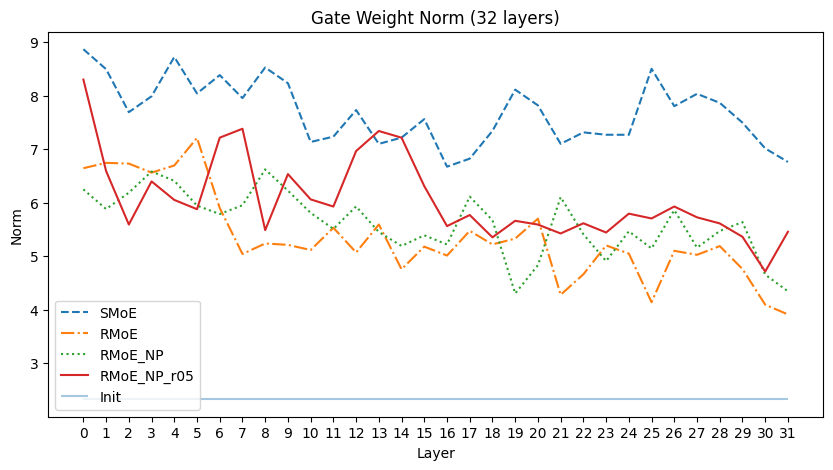

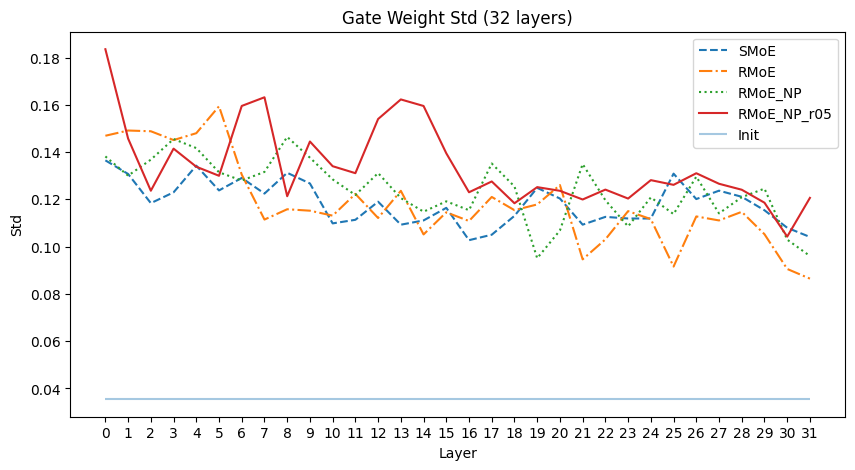

In [64]:
all_smoe_gate_weights_norm = [all_norms['SMoE'][f'module.layers.{i}.smoe.gate.gate.weight']['norm'] for i in range(n_layer)]
all_rmoe_gate_weights_norm = [all_norms['RMoE'][f'module.layers.{i}.smoe.gate.router_layer.weight']['norm'] for i in range(n_layer)]
all_rmoe_np_gate_weights_norm = [all_norms['RMoE_np'][f'module.layers.{i}.smoe.gate.router_layer.weight']['norm'] for i in range(n_layer)]
all_rmoe_np_r05_gate_weights_norm = [all_norms['RMoE_np_r05'][f'module.layers.{i}.smoe.gate.router_layer.weight']['norm'] for i in range(n_layer)]

all_smoe_gate_weights_std = [all_norms['SMoE'][f'module.layers.{i}.smoe.gate.gate.weight']['std'] for i in range(n_layer)]
all_rmoe_gate_weights_std = [all_norms['RMoE'][f'module.layers.{i}.smoe.gate.router_layer.weight']['std'] for i in range(n_layer)]
all_rmoe_np_gate_weights_std = [all_norms['RMoE_np'][f'module.layers.{i}.smoe.gate.router_layer.weight']['std'] for i in range(n_layer)]
all_rmoe_np_r05_gate_weights_std = [all_norms['RMoE_np_r05'][f'module.layers.{i}.smoe.gate.router_layer.weight']['std'] for i in range(n_layer)]

plt.figure(figsize=(10, 5))
# 调整线型
plt.plot(all_smoe_gate_weights_norm, label='SMoE', linestyle='--')
plt.plot(all_rmoe_gate_weights_norm, label='RMoE', linestyle='-.')
plt.plot(all_rmoe_np_gate_weights_norm, label='RMoE_NP', linestyle=':')
plt.plot(all_rmoe_np_r05_gate_weights_norm, label='RMoE_NP_r05', linestyle='-')
default_norm = torch.nn.Linear(264, 16).weight.norm().item()
plt.hlines(default_norm, 0, n_layer-1, label='Init', alpha=0.4)
plt.xlabel('Layer')
plt.ylabel('Norm')
plt.title(f'Gate Weight Norm ({n_layer} layers)')
plt.xticks(range(n_layer))
plt.legend()
plt.savefig(f'norm_{n_layer}.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()

plt.figure(figsize=(10, 5))
plt.plot(all_smoe_gate_weights_std, label='SMoE', linestyle='--')
plt.plot(all_rmoe_gate_weights_std, label='RMoE', linestyle='-.')
plt.plot(all_rmoe_np_gate_weights_std, label='RMoE_NP', linestyle=':')
plt.plot(all_rmoe_np_r05_gate_weights_std, label='RMoE_NP_r05', linestyle='-')
default_std = torch.nn.Linear(264, 16).weight.std().item()
# 调淡
plt.hlines(default_std, 0, n_layer-1, label='Init', alpha=0.4)
plt.title(f'Gate Weight Std ({n_layer} layers)')
plt.xlabel('Layer')
plt.ylabel('Std')
plt.xticks(range(n_layer))
plt.legend()
plt.savefig(f'std_{n_layer}.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()


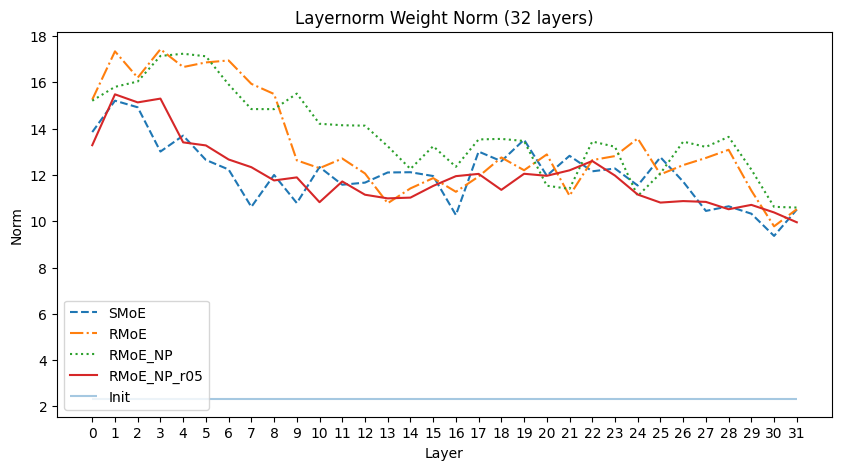

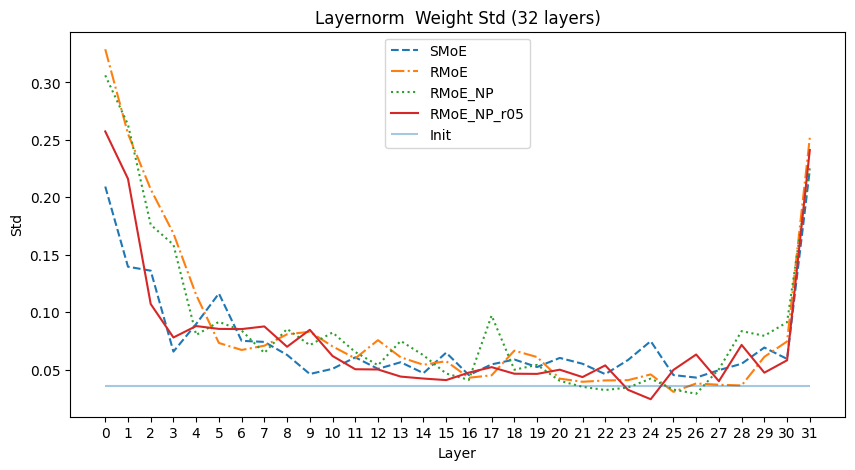

In [65]:
all_smoe_gate_weights_norm = [all_norms['SMoE'][f'module.layers.{i}.smoe.layer_norm.weight']['norm'] for i in range(n_layer)]
all_rmoe_gate_weights_norm = [all_norms['RMoE'][f'module.layers.{i}.smoe.layer_norm.weight']['norm'] for i in range(n_layer)]
all_rmoe_np_gate_weights_norm = [all_norms['RMoE_np'][f'module.layers.{i}.smoe.layer_norm.weight']['norm'] for i in range(n_layer)]
all_rmoe_np_r05_gate_weights_norm = [all_norms['RMoE_np_r05'][f'module.layers.{i}.smoe.layer_norm.weight']['norm'] for i in range(n_layer)]

all_smoe_gate_weights_std = [all_norms['SMoE'][f'module.layers.{i}.smoe.layer_norm.weight']['std'] for i in range(n_layer)]
all_rmoe_gate_weights_std = [all_norms['RMoE'][f'module.layers.{i}.smoe.layer_norm.weight']['std'] for i in range(n_layer)]
all_rmoe_np_gate_weights_std = [all_norms['RMoE_np'][f'module.layers.{i}.smoe.layer_norm.weight']['std'] for i in range(n_layer)]
all_rmoe_np_r05_gate_weights_std = [all_norms['RMoE_np_r05'][f'module.layers.{i}.smoe.layer_norm.weight']['std'] for i in range(n_layer)]

plt.figure(figsize=(10, 5))
# 调整线型
plt.plot(all_smoe_gate_weights_norm, label='SMoE', linestyle='--')
plt.plot(all_rmoe_gate_weights_norm, label='RMoE', linestyle='-.')
plt.plot(all_rmoe_np_gate_weights_norm, label='RMoE_NP', linestyle=':')
plt.plot(all_rmoe_np_r05_gate_weights_norm, label='RMoE_NP_r05', linestyle='-')
default_norm = torch.nn.Linear(264, 16).weight.norm().item()
plt.hlines(default_norm, 0, n_layer-1, label='Init', alpha=0.4)
plt.xlabel('Layer')
plt.ylabel('Norm')
plt.title(f'Layernorm Weight Norm ({n_layer} layers)')
plt.xticks(range(n_layer))
plt.legend()
plt.savefig(f'Layernorm_norm_{n_layer}.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close()

plt.figure(figsize=(10, 5))
plt.plot(all_smoe_gate_weights_std, label='SMoE', linestyle='--')
plt.plot(all_rmoe_gate_weights_std, label='RMoE', linestyle='-.')
plt.plot(all_rmoe_np_gate_weights_std, label='RMoE_NP', linestyle=':')
plt.plot(all_rmoe_np_r05_gate_weights_std, label='RMoE_NP_r05', linestyle='-')
default_std = torch.nn.Linear(264, 16).weight.std().item()
# 调淡
plt.hlines(default_std, 0, n_layer-1, label='Init', alpha=0.4)
plt.title(f'Layernorm  Weight Std ({n_layer} layers)')
plt.xlabel('Layer')
plt.ylabel('Std')
plt.xticks(range(n_layer))
plt.legend()
plt.savefig(f'Layernorm_std_{n_layer}.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()